In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker 
import os
import pandas as pd

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord
from astropy.coordinates import get_body_barycentric
from astropy.coordinates import get_body
from scipy.optimize import curve_fit


import sunpy.map
from sunpy.coordinates import frames
import sunpy.coordinates as coord

from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go

plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular", 'axes.linewidth' : 3})

In [3]:
full_data0 = pd.read_csv("Full_Run_v8.csv")
full_data1 = full_data0.dropna() #Removing flares not caught by GOES-15 (incomplete data)
full_data = full_data1[full_data1['Peak EM Long'] < 7e50][~full_data1['fl_goescls'].astype(str).str.contains("A")] #Removing calibration flares

In [4]:
full_data = full_data.drop_duplicates(['event_starttime', 'fl_goescls'])
print(len(full_data))
# full_data.to_csv("Full_Run_v7.csv")

10332


## Looking at flags

In [6]:
prox_flag_no = len(full_data[full_data['Proximity Flag'] == True])
background_flag_no = len(full_data[full_data['Background Flag'] == True])
noflag_no = len(full_data[full_data['Proximity Flag'] == False][full_data['Background Flag'] == False])#[full_data['Onset Flag'] == False])
total_no = len(full_data)

print(f"The total amount of data is: {total_no}")
print(f'The number of flags raised by proximity flag is: {prox_flag_no}, {(prox_flag_no/total_no)*100:.1f} %')
print(f'The number of flags raised by background flag is: {background_flag_no}, {(background_flag_no/total_no)*100:.1f} %')
print("")
print(f'The number of entries with no background or proximity flag is: {noflag_no}, {(noflag_no/total_no)*100:.1f} %')


The total amount of data is: 10332
The number of flags raised by proximity flag is: 2631, 25.5 %
The number of flags raised by background flag is: 507, 4.9 %

The number of entries with no background or proximity flag is: 7271, 70.4 %


C:\Users\William\AppData\Local\Temp\ipykernel_16536\4213204905.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  noflag_no = len(full_data[full_data['Proximity Flag'] == False][full_data['Background Flag'] == False])#[full_data['Onset Flag'] == False])


In [7]:
back_flag_x = len(full_data[full_data['Background Flag'] == True][full_data1['fl_goescls'].astype(str).str.contains("X")])
back_flag_m = len(full_data[full_data['Background Flag'] == True][full_data1['fl_goescls'].astype(str).str.contains("M")])
back_flag_c = len(full_data[full_data['Background Flag'] == True][full_data1['fl_goescls'].astype(str).str.contains("C")])
back_flag_b = len(full_data[full_data['Background Flag'] == True][full_data1['fl_goescls'].astype(str).str.contains("B")])
x_no = len(full_data[full_data1['fl_goescls'].astype(str).str.contains("X")])
m_no = len(full_data[full_data1['fl_goescls'].astype(str).str.contains("M")])
c_no = len(full_data[full_data1['fl_goescls'].astype(str).str.contains("C")])
b_no = len(full_data[full_data1['fl_goescls'].astype(str).str.contains("B")])


print(f"The percentage of all bckg flags raised by X-class are: {back_flag_x/background_flag_no *100}")
print(f"The perecentage of all flares that are X are: {x_no/total_no*100}")
print(f'This is {back_flag_x/x_no *100} % of all X-class flares')
print("")
print(f"The percentage of all bckg flags raised by M-class are: {back_flag_m/background_flag_no *100}")
print(f"The perecentage of all flares that are m are: {m_no/total_no*100}")
print(f'This is {back_flag_m/m_no *100} % of all M-class flares')
print("")
print(f"The percentage of all bckg flags raised by C-class are: {back_flag_c/background_flag_no *100}")
print(f"The perecentage of all flares that are c are: {c_no/total_no*100}")
print(f'This is {back_flag_c/c_no *100} % of all C-class flares')
print("")
print(f"The percentage of all bckg flags raised by B-class are: {back_flag_b/background_flag_no *100}")
print(f"The perecentage of all flares that are b are: {b_no/total_no*100}")
print(f'This is {back_flag_b/b_no *100 }% of all B-class flares')



The percentage of all bckg flags raised by X-class are: 0.39447731755424065
The perecentage of all flares that are X are: 0.38714672861014326
This is 5.0 % of all X-class flares

The percentage of all bckg flags raised by M-class are: 4.930966469428008
The perecentage of all flares that are m are: 6.233062330623306
This is 3.881987577639751 % of all M-class flares

The percentage of all bckg flags raised by C-class are: 30.76923076923077
The perecentage of all flares that are c are: 63.18234610917538
This is 2.389705882352941 % of all C-class flares

The percentage of all bckg flags raised by B-class are: 63.905325443786985
The perecentage of all flares that are b are: 30.197444831591174
This is 10.384615384615385% of all B-class flares


C:\Users\William\AppData\Local\Temp\ipykernel_16536\16103338.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  back_flag_x = len(full_data[full_data['Background Flag'] == True][full_data1['fl_goescls'].astype(str).str.contains("X")])
C:\Users\William\AppData\Local\Temp\ipykernel_16536\16103338.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  back_flag_m = len(full_data[full_data['Background Flag'] == True][full_data1['fl_goescls'].astype(str).str.contains("M")])
C:\Users\William\AppData\Local\Temp\ipykernel_16536\16103338.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  back_flag_c = len(full_data[full_data['Background Flag'] == True][full_data1['fl_goescls'].astype(str).str.contains("C")])
C:\Users\William\AppData\Local\Temp\ipykernel_16536\16103338.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  back_flag_b = len(full_data[full_data['Background F

### Peak TEM and Onset TEM for a range of different onset intervals:
'Fancy Method'; 1/8 of impulsive phase; 1/8 -> 1/6 of imp phase; 1/8 -> 1/4; 1/8 -> 1/3; 1/8 -> 1/2; 1/8 -> 2/3; 1/8 -> 3/4.

In [8]:
full_data = full_data[full_data['Proximity Flag'] == False][full_data['Background Flag'] == False]#[full_data['Onset Flag'] == False]

C:\Users\William\AppData\Local\Temp\ipykernel_16536\2695549529.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  full_data = full_data[full_data['Proximity Flag'] == False][full_data['Background Flag'] == False]#[full_data['Onset Flag'] == False]


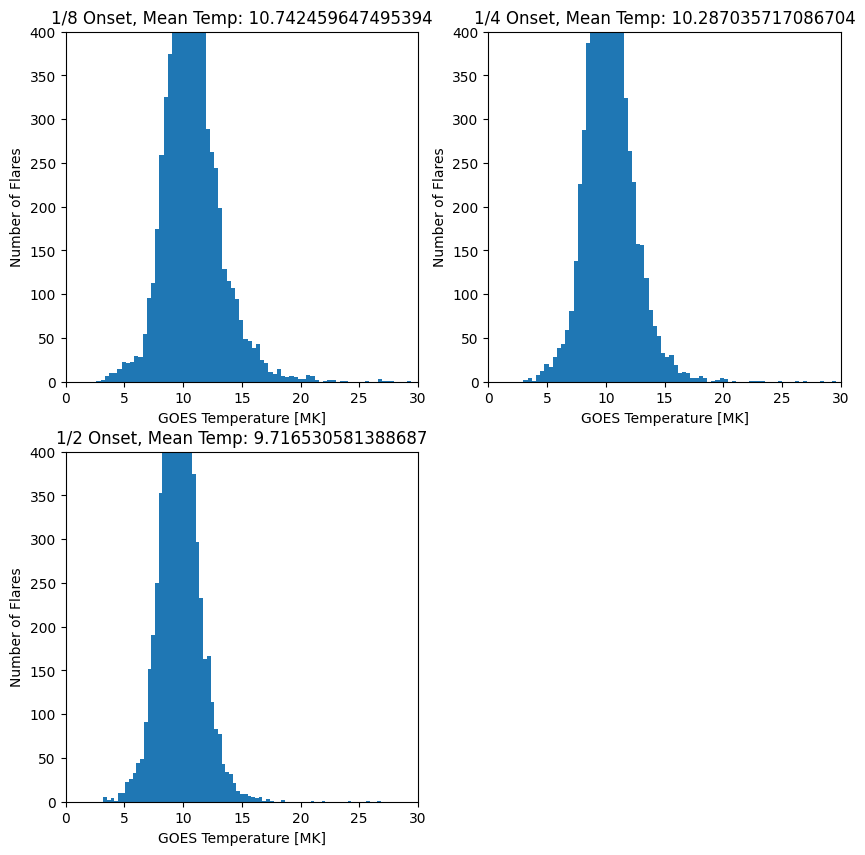

In [12]:
plt.rcdefaults()

fig= plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title(f"1/8 Onset, Mean Temp: {np.mean(full_data['Temp 1/8'][full_data['Temp 1/8'] < 30].values)}")
ax1.hist(full_data['Temp 1/8'][full_data['Temp 1/8'] < 30].values, bins = 75)
ax1.set_ylabel("Number of Flares")
ax1.set_xlabel("GOES Temperature [MK]")
ax1.set_xlim([0,30])
ax1.set_ylim([0, 400])

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title(f"1/4 Onset, Mean Temp: {np.mean(full_data['Temp 1/4'][full_data['Temp 1/4'] < 30].values)}")
ax2.hist(full_data['Temp 1/4'][full_data['Temp 1/4'] < 30].values, bins = 75)
ax2.set_ylabel("Number of Flares")
ax2.set_xlabel("GOES Temperature [MK]")
ax2.set_xlim([0,30])
ax2.set_ylim([0, 400])

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title(f"1/2 Onset, Mean Temp: {np.mean(full_data['Temp 1/2'][full_data['Temp 1/2'] < 30].values)}")
ax3.hist(full_data['Temp 1/2'][full_data['Temp 1/2'] < 30].values, bins = 75)
ax3.set_ylabel("Number of Flares")
ax3.set_xlabel("GOES Temperature [MK]")
ax3.set_xlim([0,30])
ax3.set_ylim([0, 400])

# ax4 = fig.add_subplot(2, 2, 4)
# ax4.set_title(f"3/4 Onset, Mean Temp: {np.mean(full_data['Temp 3/4'][full_data['Temp 3/4'] < 30].values)}")
# ax4.hist(full_data['Temp 3/4'][full_data['Temp 3/4'] < 30].values, bins = 75)
# ax4.set_ylabel("Number of Flares")
# ax4.set_xlabel("GOES Temperature [MK]")
# ax4.set_xlim([0,30])
# ax4.set_ylim([0, 400])

plt.show()

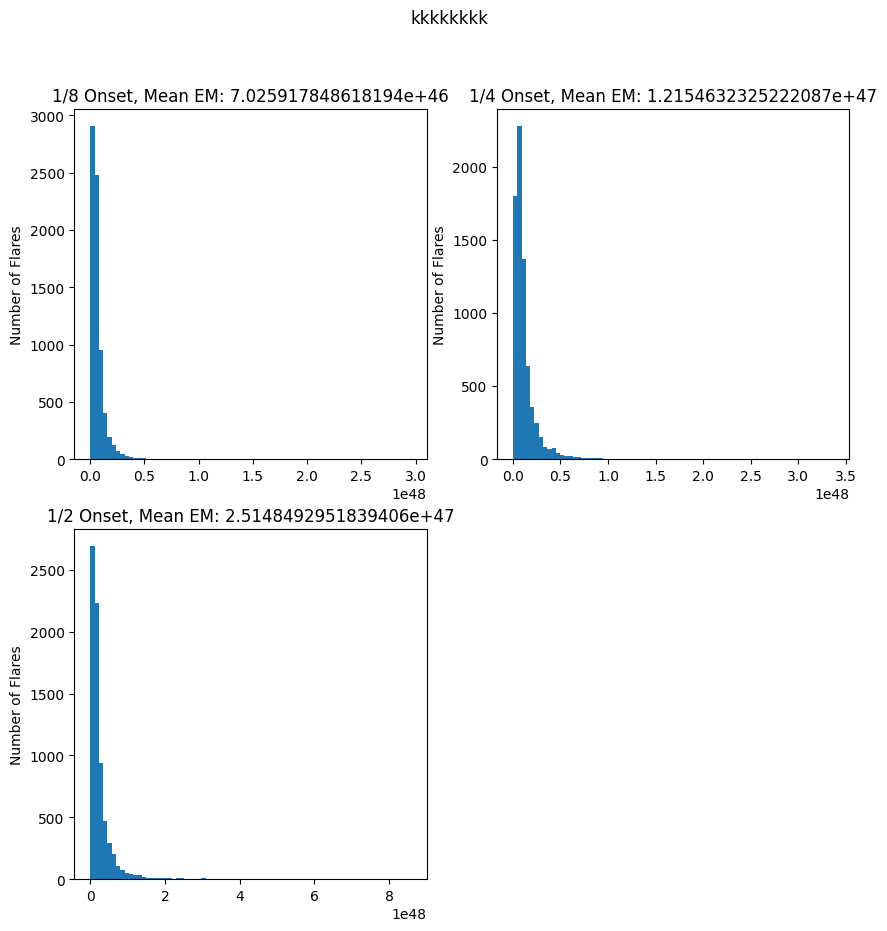

In [14]:
plt.rcdefaults()

fig= plt.figure(figsize=(10, 10))
fig.suptitle(f'kkkkkkkk')


ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title(f"1/8 Onset, Mean EM: {np.mean(full_data['EM 1/8'].values)}")
ax1.hist(full_data['EM 1/8'].values, bins = 75)
ax1.set_ylabel("Number of Flares")
#ax1.set_xscale("log")
# #ax1.set_xlabel("GOES Temperature [MK]")
# ax1.set_xlim([0,30])
# ax1.set_ylim([0, 400])
# ax1.legend()

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title(f"1/4 Onset, Mean EM: {np.mean(full_data['EM 1/4'].values)}")
ax2.hist(full_data['EM 1/4'].values, bins = 75)
ax2.set_ylabel("Number of Flares")
#ax2.set_xscale("log")
# #ax2.set_xlabel("GOES Temperature [MK]")
# ax2.set_xlim([0,30])
# ax2.set_ylim([0, 400])
# ax2.legend()

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title(f"1/2 Onset, Mean EM: {np.mean(full_data['EM 1/2'].values)}")
ax3.hist(full_data['EM 1/2'].values, bins = 75)
ax3.set_ylabel("Number of Flares")
#ax3.set_xscale("log")
# #ax3.set_xlabel("GOES Temperature [MK]")
# ax3.set_xlim([0,30])
# ax3.set_ylim([0, 400])
# ax3.legend()

# ax4 = fig.add_subplot(2, 2, 4)
# ax4.set_title(f"3/4 Onset, Mean EM: {np.mean(full_data['EM 3/4'].values)}")
# ax4.hist(full_data['EM 3/4'].values, bins = 75)
# ax4.set_ylabel("Number of Flares")
#ax4.set_xscale("log")
# ax4.set_xlabel("GOES Temperature [MK]")
# # ax4.set_xlim([0,30])
# # ax4.set_ylim([0, 400])
# ax4.legend()

plt.show()

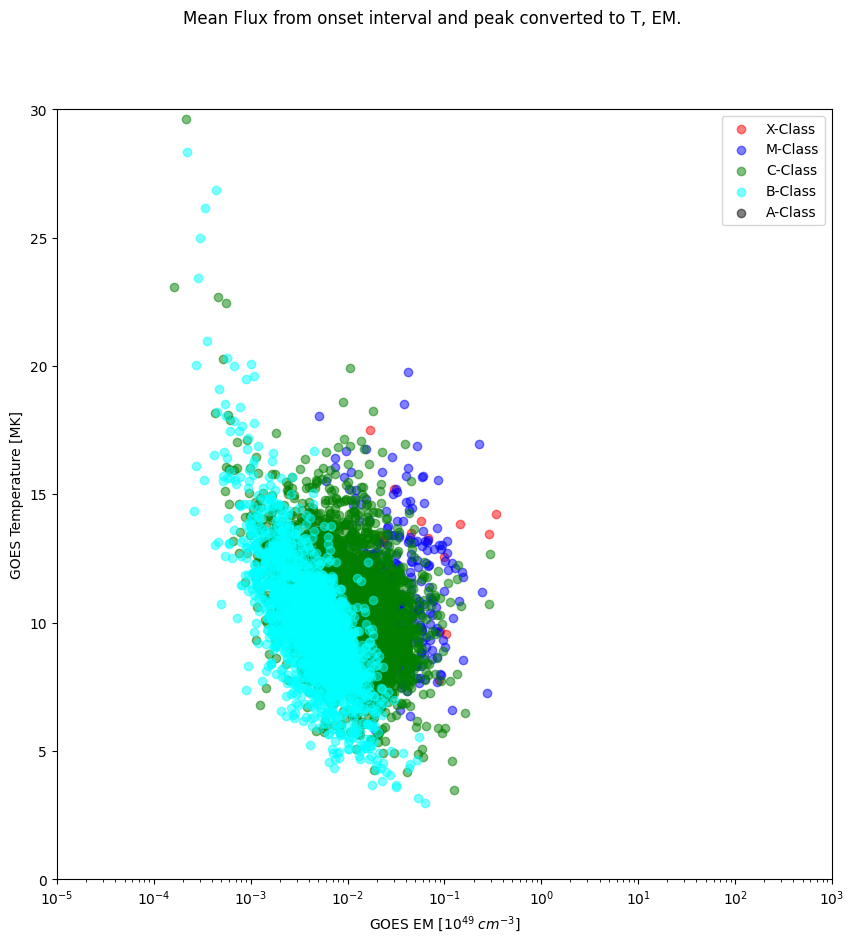

In [15]:
plt.rcdefaults()

fig= plt.figure(figsize=(10, 10))
# fig.suptitle(f'Mean EM and Temperature from the onset interval, and the EM and Temp at the peak time. All GOES-15 Flares')
fig.suptitle(f'Mean Flux from onset interval and peak converted to T, EM.')




ax2 = fig.add_subplot(1, 1, 1)

ax2.scatter(full_data["EM 1/4"][full_data['fl_goescls'].astype(str).str.contains("X")].values*1e-49,full_data['Temp 1/4'][full_data['fl_goescls'].astype(str).str.contains("X")].values, marker = None,color = 'red', alpha = 0.5, label = "X-Class")
ax2.scatter(full_data["EM 1/4"][full_data['fl_goescls'].astype(str).str.contains("M")].values*1e-49,full_data['Temp 1/4'][full_data['fl_goescls'].astype(str).str.contains("M")].values, marker = None,color = 'blue', alpha = 0.5, label = "M-Class")
ax2.scatter(full_data["EM 1/4"][full_data['fl_goescls'].astype(str).str.contains("C")].values*1e-49,full_data['Temp 1/4'][full_data['fl_goescls'].astype(str).str.contains("C")].values, marker = None,color = 'green', alpha = 0.5, label = "C-Class")
ax2.scatter(full_data["EM 1/4"][full_data['fl_goescls'].astype(str).str.contains("B")].values*1e-49,full_data['Temp 1/4'][full_data['fl_goescls'].astype(str).str.contains("B")].values, marker = None,color = 'cyan', alpha = 0.5, label = "B-Class")
ax2.scatter(full_data["EM 1/4"][full_data['fl_goescls'].astype(str).str.contains("A")].values*1e-49,full_data['Temp 1/4'][full_data['fl_goescls'].astype(str).str.contains("A")].values, marker = None,color = 'black', alpha = 0.5, label = "A-Class")

#ax2.scatter(full_data['Peak Flux'].values*1e-49,full_data['Peak Temp Long'].values, marker = None,color = 'red', alpha = 0.2, label = "Peak")
ax2.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
ax2.set_ylabel("GOES Temperature [MK]")
ax2.set_xscale("log")
ax2.set_ylim([0,30])
ax2.set_xlim([1e-5, 1e3])
ax2.legend()


plt.show()

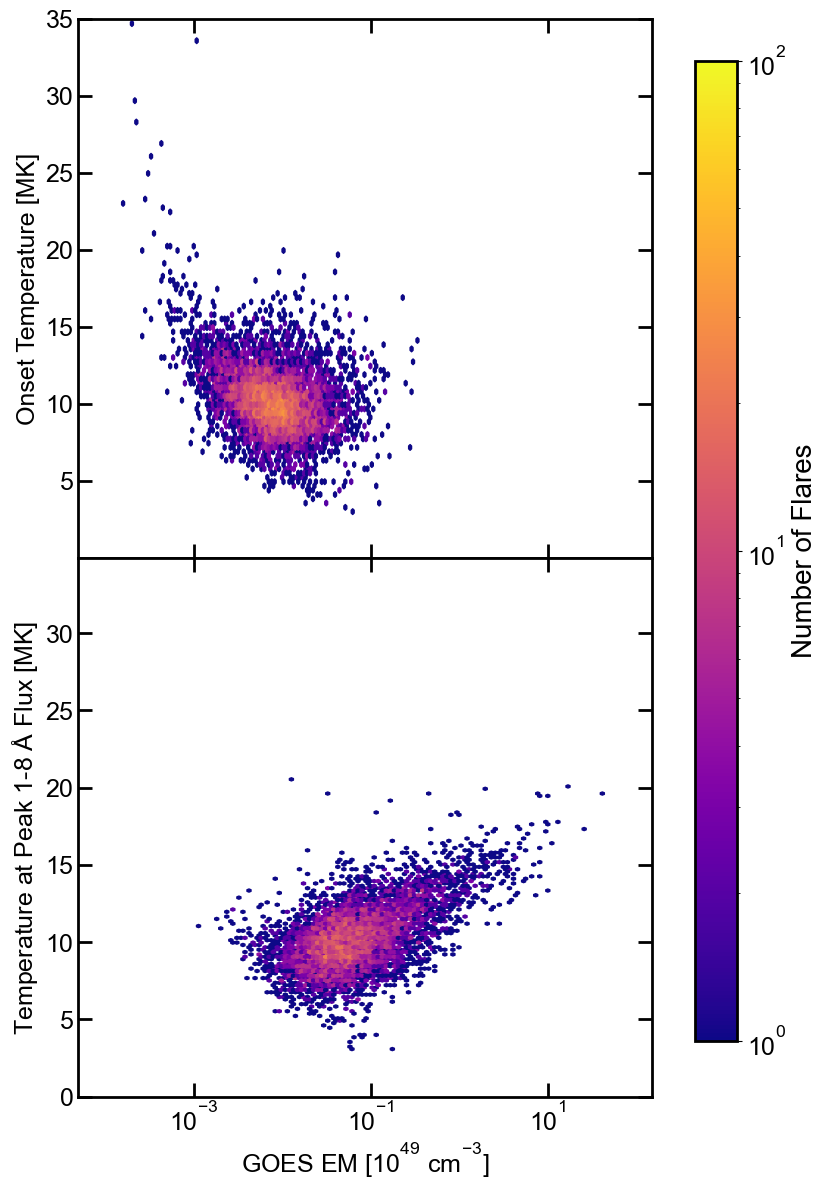

In [16]:
fig = plt.figure(figsize=(8.5, 14))
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular", 'axes.linewidth' : 2})
plt.subplots_adjust(wspace = 0, hspace = 0)
plt.tight_layout()

ax = fig.add_subplot(2, 1, 1)
#ax.set_title("Comparison of Onset Temperature with the Peak", pad = 10, fontsize = 25)
hb1 = ax.hexbin(full_data['EM 1/4'].values*1e-49, full_data['Temp 1/4'], xscale='log',
          gridsize=100, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
#plt.colorbar(hb1)
ax.set_ylabel("Onset Temperature [MK]")
ax.set_ylim([0.01,35])
ax.set_xlim([5e-5, 1.5e2])
ax.xaxis.set_ticklabels([])
ax.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
ax.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax.tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.tick_params(which='minor', size=5, width=2, direction='in', right='on')



ax1 = fig.add_subplot(2, 1, 2)
hb2 = ax1.hexbin(full_data['Peak EM Long'].values*1e-49, full_data['Peak Temp Long'], xscale='log',
          gridsize=100, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
#plt.colorbar(hb2)
# ax.set_xlabel("E[$Wm^{-2}$]")
ax1.set_ylabel("Temperature at Peak 1-8$\;\AA$ Flux [MK]")
ax1.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
ax1.set_ylim([0,34.9])
ax1.set_xlim([5e-5, 1.5e2])
ax1.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
# ax1.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax1.tick_params(which='major', size=10, width=2, direction='in', right='on')
# ax1.tick_params(which='minor', size=5, width=2, direction='in', right='on')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(hb1, cax=cbar_ax, pad = 3).set_label( label = "Number of Flares",size=20)

plt.minorticks_on()
#plt.savefig("Presentation_Graphs/T_compare.pdf", bbox_inches = 'tight',pad_inches = 0)
plt.show()



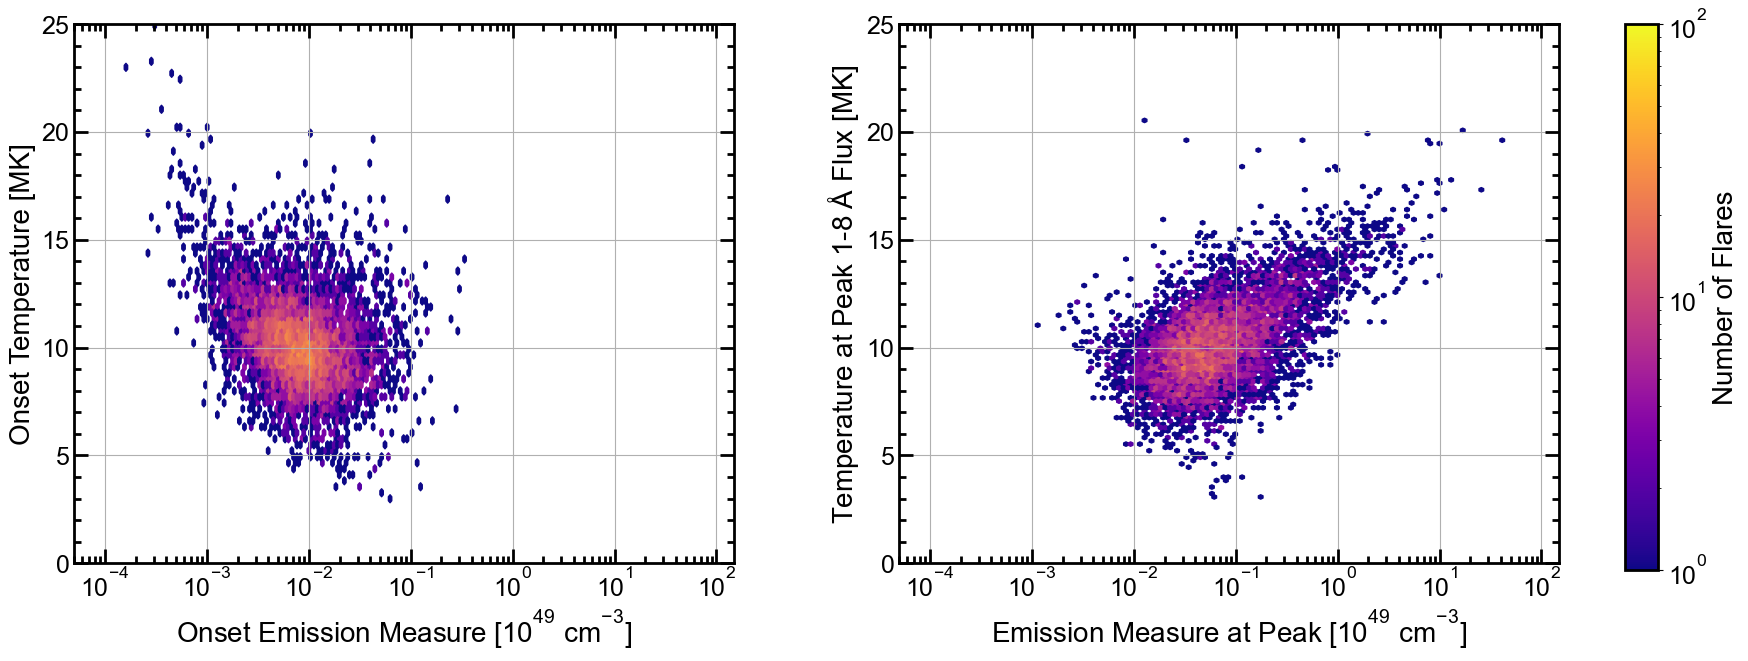

In [17]:
fig = plt.figure(figsize=(22, 7))
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular", 'axes.linewidth' : 2})
plt.subplots_adjust(wspace = 0.25, hspace = 0)
plt.tight_layout()

ax = fig.add_subplot(1, 2, 1)
#ax.set_title("Comparison of Onset Temperature with the Peak", pad = 10, fontsize = 25)
hb1 = ax.hexbin(full_data['EM 1/4'].values*1e-49, full_data['Temp 1/4'], xscale='log',
          gridsize=100, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
#plt.colorbar(hb1)
ax.set_ylabel("Onset Temperature [MK]", fontsize = 20)
ax.set_xlabel("Onset Emission Measure [$10^{49}\;cm^{-3}$]", fontsize = 20)
ax.set_ylim([0,25])
ax.set_xlim([5e-5, 1.5e2])
ax.yaxis.set_major_locator(ticker.AutoLocator())
ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.xaxis.set_major_locator(ticker.LogLocator())
ax.xaxis.set_minor_locator(ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
ax.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
ax.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax.tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.tick_params(which='minor', size=5, width=2, direction='in', right='on')
ax.grid()


ax1 = fig.add_subplot(1, 2, 2)
hb2 = ax1.hexbin(full_data['Peak EM Long'].values*1e-49, full_data['Peak Temp Long'], xscale='log',
          gridsize=100, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
ax1.set_ylabel("Temperature at Peak 1-8$\;\AA$ Flux [MK]", fontsize = 20)
ax1.set_xlabel("Emission Measure at Peak [$10^{49}\;cm^{-3}$]", fontsize = 20)
ax1.set_ylim([0,25])
ax1.set_xlim([5e-5, 1.5e2])
ax1.yaxis.set_major_locator(ticker.AutoLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.xaxis.set_major_locator(ticker.LogLocator())
ax1.xaxis.set_minor_locator(ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10))
ax1.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
ax1.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax1.tick_params(which='major', size=10, width=2, direction='in', right='on')
ax1.tick_params(which='minor', size=5, width=2, direction='in', right='on')
ax1.grid()

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.83, 0.1, 0.015, 0.78])
fig.colorbar(hb1, cax=cbar_ax, pad = 3).set_label( label = "Number of Flares",size=20)

plt.minorticks_on()
#plt.savefig("Presentation_Graphs/T_compare_new.pdf", bbox_inches = 'tight',pad_inches = 0)
plt.show()

In [18]:
print(np.mean(full_data['EM 1/4'].values))
print(np.mean(full_data['Temp 1/4']))

1.2154632325222087e+47
10.293609286699462


In [ ]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.interpolate import griddata

# # create the hexbin plot
# fig, ax = plt.subplots()
# hb = ax.hexbin(full_data['EM 1/4'].values*1e-49, full_data['Temp 1/4'],
#                xscale='log', gridsize=100, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))

# # get the hexbin statistics
# counts = hb.get_array()
# xbins = hb.get_offsets()[:, 0]
# ybins = hb.get_offsets()[:, 1]

# # create a meshgrid of the bin edges
# xgrid, ygrid = np.meshgrid(xbins, ybins)

# # interpolate the bin statistics to a finer grid
# xi, yi = np.linspace(xbins.min(), xbins.max(), 500), np.linspace(ybins.min(), ybins.max(), 500)
# zi = griddata(xbins, ybins, counts, xi, yi)

# # plot the contour lines
# levels = np.logspace(0, 2, 7)
# cntr = ax.contour(xi, yi, zi, levels=levels, linewidths=2, colors='k')

# # add a colorbar
# cbar = fig.colorbar(hb, ax=ax)
# cbar.ax.tick_params(labelsize=20)

# # set the plot labels and ticks
# ax.set_ylabel("Onset Temperature [MK]", fontsize=25)
# ax.set_xlabel("Onset Emission Measure [$10^{49}\;cm^{-3}$]", fontsize=25)
# ax.set_ylim([0, 35])
# ax.set_xlim([5e-5, 1.5e2])
# ax.yaxis.set_major_locator(plt.AutoLocator())
# ax.yaxis.set_minor_locator(plt.AutoMinorLocator())
# ax.xaxis.set_major_locator(plt.LogLocator())
# ax.xaxis.set_minor_locator(plt.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=10))
# ax.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
# ax.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
# ax.tick_params(which='major', size=10, width=2, direction='in', right='on')
# ax.tick_params(which='minor', size=5, width=2, direction='in', right='on')
# ax.grid()

# # show the plot
# plt.show()


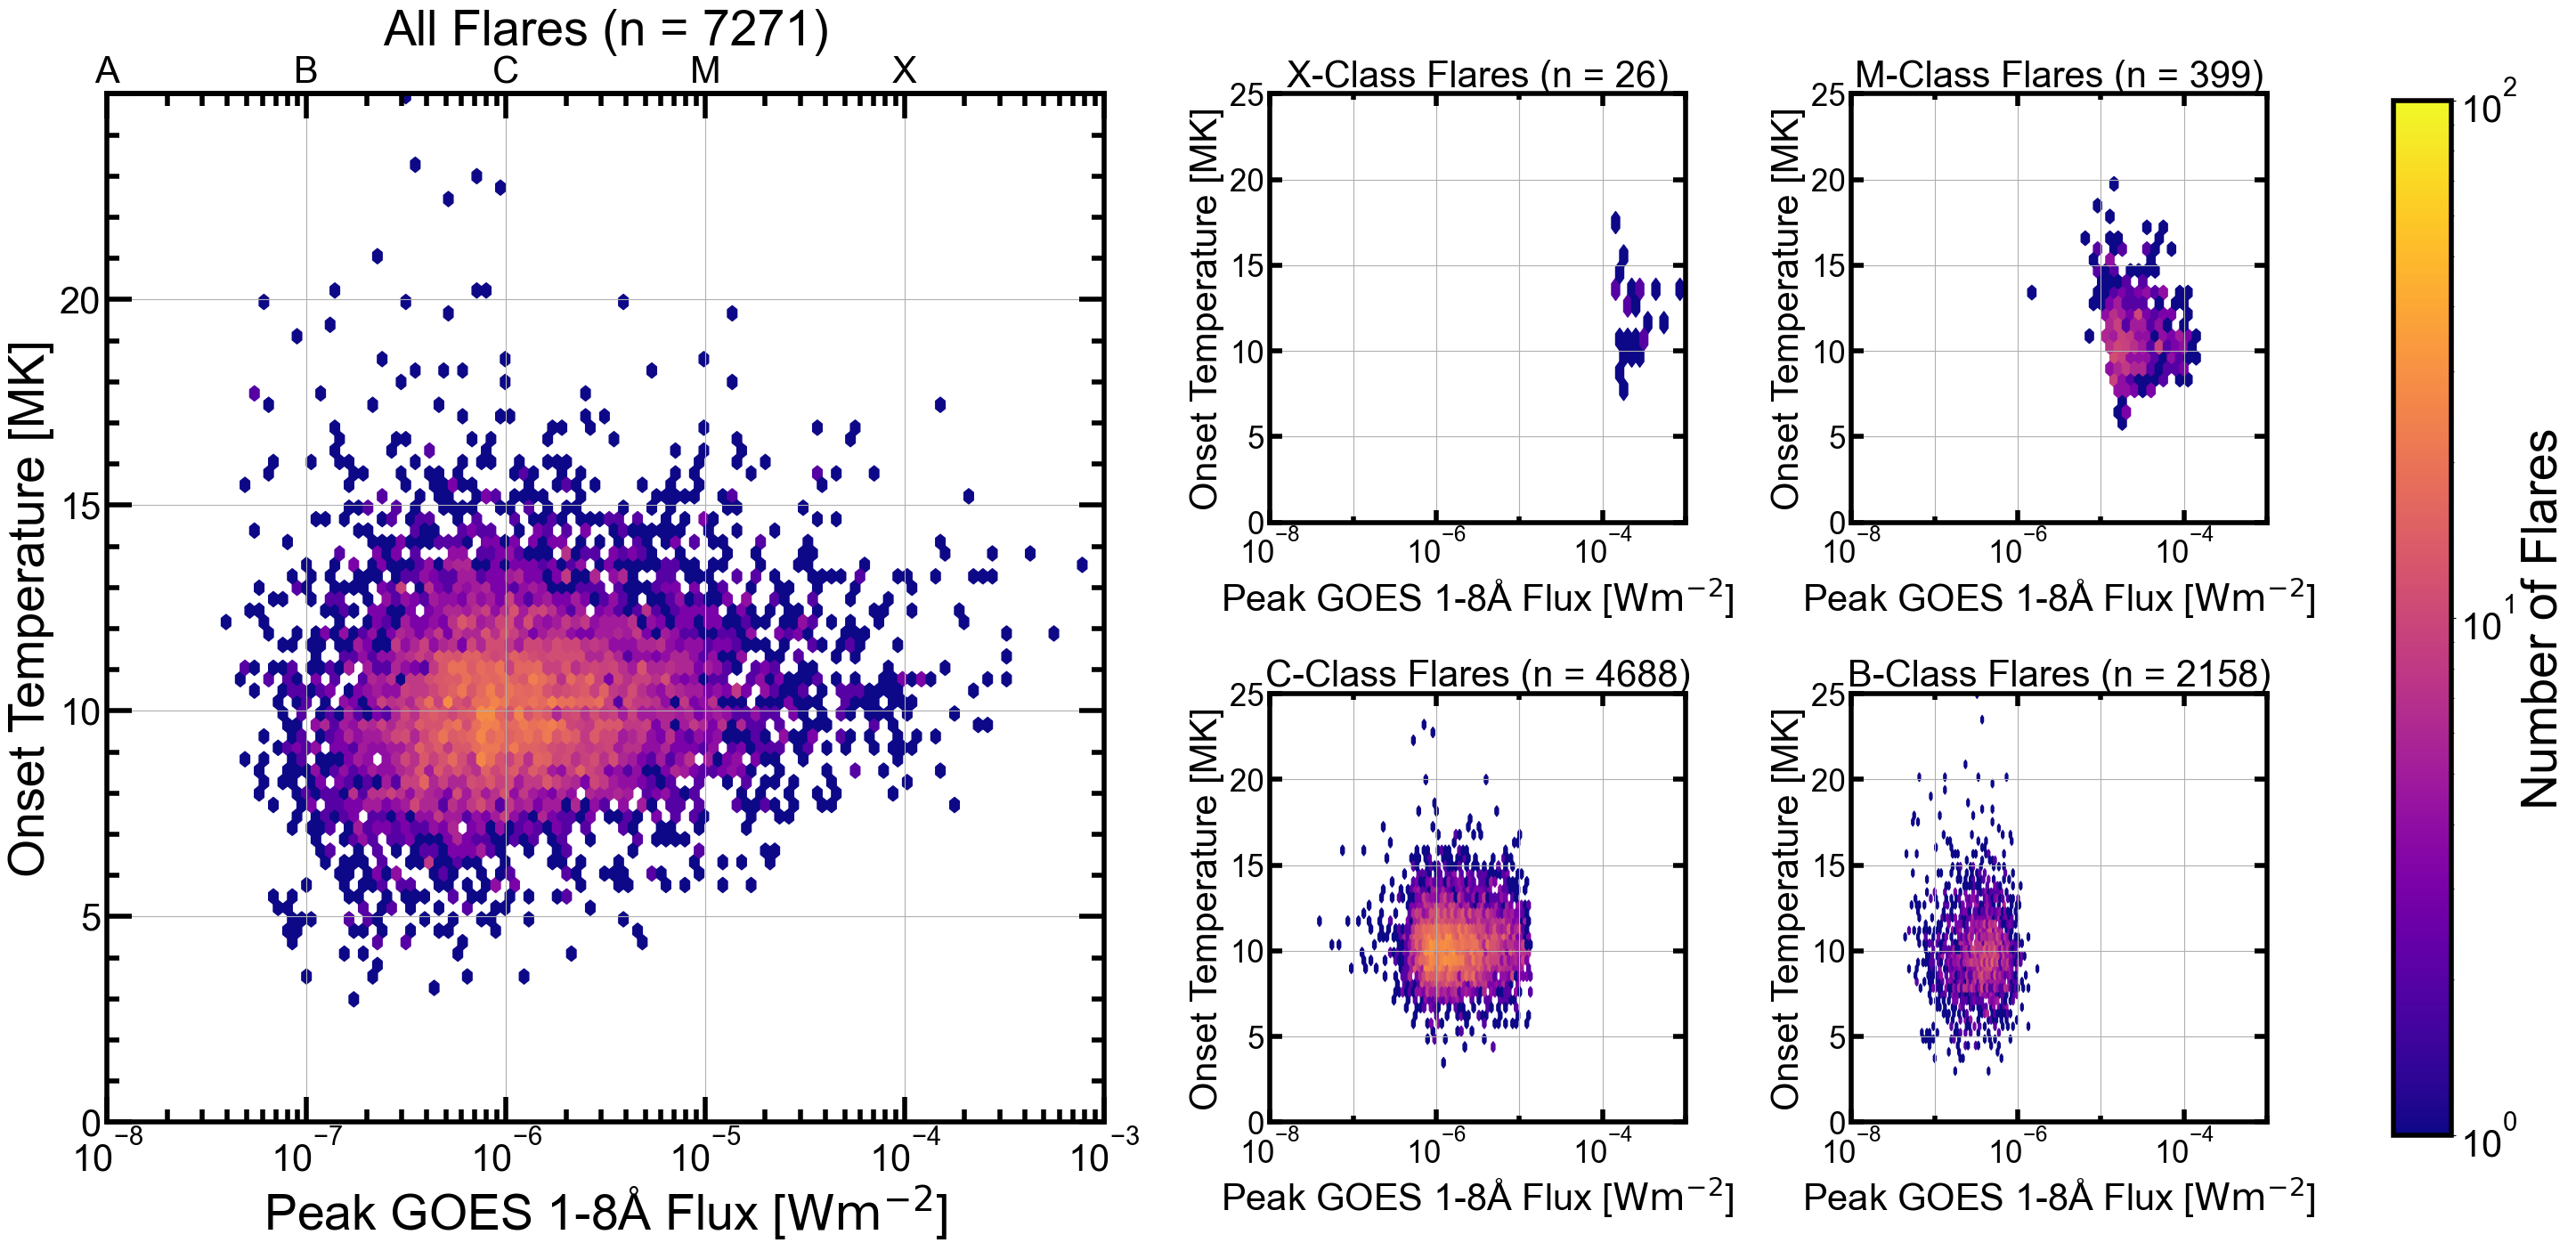

In [19]:
fig = plt.figure(figsize=(65, 15), linewidth = 3)
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular", 'axes.linewidth' : 4})

gs=GridSpec(2,8) 
#plt.suptitle("Onset Temperature Breakdown, by Class",x = 0.32, fontsize=60)

ax1=fig.add_subplot(gs[:,:2]) # First row, first column
total_no = len(full_data['Peak Flux'])
ax1.set_title(f"All Flares (n = {total_no})", fontsize = 40)
hb1 = ax1.hexbin(full_data['Peak Flux'], full_data['Temp 1/4'], xscale='log',
          gridsize=100, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
# plt.colorbar(hb1, ax = ax1)
ax1.set_ylabel("Onset Temperature [MK]", fontsize = 40)
ax1.set_xlabel("Peak GOES 1-8$\AA$ Flux [$\mathrm{Wm^{-2}}$]", fontsize = 40)
ax1.set_ylim([0,25])
ax1.set_xlim([1e-8, 1e-3])
ax1.yaxis.set_major_locator(ticker.AutoLocator())
ax1.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax1.tick_params('both', which='major', size=20, width=4, direction='in', top='on')
ax1.tick_params('both', which='minor', size=10, width=4, direction='in', top='on')
ax1.tick_params(which='major', size=20, width=4, direction='in', right='on')
ax1.tick_params(which='minor', size=10, width=4, direction='in', right='on')
ax1.tick_params(axis='x', labelsize=30, pad = 5)
ax1.tick_params(axis='y', labelsize=30, pad = 5)
ax1.grid()


ax2=fig.add_subplot(gs[0,2]) # First row, second column
x_no = len(full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("X")])
ax2.set_title(f"X-Class Flares (n = {x_no})", fontsize = 30)
hb2 = ax2.hexbin(full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("X")], full_data['Temp 1/4'][full_data['fl_goescls'].astype(str).str.contains("X")], xscale='log',
          gridsize=10, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
# plt.colorbar(hb2, ax )
ax2.set_ylabel("Onset Temperature [MK]", fontsize = 30)
ax2.set_xlabel("Peak GOES 1-8$\AA$ Flux [$\mathrm{Wm^{-2}}$]", fontsize = 30)
ax2.set_ylim([0,25])
ax2.set_xlim([1e-8, 1e-3])
ax2.set_xlim([1e-8, 1e-3])
ax2.set_xticks([1e-7,1e-5,1e-3], minor=True)
ax2.set_xticklabels([], minor = True)
ax2.tick_params('both', which='major', size=10, width=4, direction='in', top='on')
ax2.tick_params('both', which='minor', size=5, width=4, direction='in', top='on')
ax2.tick_params(which='major', size=10, width=4, direction='in', right='on')
ax2.tick_params(which='minor', size=5, width=4, direction='in', right='on')
ax2.tick_params(axis='x', labelsize=25, pad = 5)
ax2.tick_params(axis='y', labelsize=25, pad = 5)
ax2.grid(which = "both")

ax3=fig.add_subplot(gs[0,3]) # First row, third column
m_no = len(full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("M")])
ax3.set_title(f"M-Class Flares (n = {m_no})", fontsize = 30)
hb3 = ax3.hexbin(full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("M")], full_data['Temp 1/4'][full_data['fl_goescls'].astype(str).str.contains("M")], xscale='log',
          gridsize=20, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
# plt.colorbar(hb3)
ax3.set_ylabel("Onset Temperature [MK]", fontsize = 30)
ax3.set_xlabel("Peak GOES 1-8$\AA$ Flux [$\mathrm{Wm^{-2}}$]", fontsize =30)
ax3.set_ylim([0,25])
ax3.set_xlim([1e-8, 1e-3])
ax3.set_xticks([1e-7,1e-5,1e-3], minor=True)
ax3.set_xticklabels([], minor = True)
ax3.tick_params('both', which='major', size=10, width=4, direction='in', top='on')
ax3.tick_params('both', which='minor', size=5, width=4, direction='in', top='on')
ax3.tick_params(which='major', size=10, width=4, direction='in', right='on')
ax3.tick_params(which='minor', size=5, width=4, direction='in', right='on')
ax3.tick_params(axis='x', labelsize=25, pad = 5)
ax3.tick_params(axis='y', labelsize=25, pad = 5)
ax3.grid(which = "both")


ax4=fig.add_subplot(gs[1,2])
c_no = len(full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("C")])
ax4.set_title(f"C-Class Flares (n = {c_no})", fontsize = 30)
hb4 = ax4.hexbin(full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("C")], full_data['Temp 1/4'][full_data['fl_goescls'].astype(str).str.contains("C")], xscale='log',
          gridsize=60, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
#plt.colorbar(hb4)
ax4.set_ylabel("Onset Temperature [MK]", fontsize = 30)
ax4.set_xlabel("Peak GOES 1-8$\AA$ Flux [$\mathrm{Wm^{-2}}$]", fontsize = 30)
ax4.set_ylim([0,25])
ax4.set_xlim([1e-8, 1e-3])
ax4.set_xticks([1e-7,1e-5,1e-3], minor=True)
ax4.set_xticklabels([], minor = True)
ax4.tick_params('both', which='major', size=10, width=4, direction='in', top='on')
ax4.tick_params('both', which='minor', size=5, width=4, direction='in', top='on')
ax4.tick_params(which='major', size=10, width=4, direction='in', right='on')
ax4.tick_params(which='minor', size=5, width=4, direction='in', right='on')
ax4.tick_params(axis='x', labelsize=25, pad = 5)
ax4.tick_params(axis='y', labelsize=25, pad = 5)
ax4.grid(which = "both")

ax5=fig.add_subplot(gs[1,3]) # Second row, span all columns
b_no = len(full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("B")])
ax5.set_title(f"B-Class Flares (n = {b_no})", fontsize = 30)
hb5 = ax5.hexbin(full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("B")], full_data['Temp 1/4'][full_data['fl_goescls'].astype(str).str.contains("B")], xscale='log',
          gridsize=60, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
#plt.colorbar(hb5)
ax5.set_ylabel("Onset Temperature [MK]", fontsize = 30)
ax5.set_xlabel("Peak GOES 1-8$\AA$ Flux [$\mathrm{Wm^{-2}}$]", fontsize = 30)
ax5.set_ylim([0,25])
ax5.set_xlim([1e-8, 1e-3])
ax5.set_xlim([1e-8, 1e-3])
ax5.set_xticklabels([], minor = True)
ax5.set_xticks([1e-7,1e-5,1e-3], minor=True)
ax5.tick_params('both', which='major', size=10, width=4, direction='in', top='on')
ax5.tick_params('both', which='minor', size=5, width=4, direction='in', top='on')
ax5.tick_params(which='major', size=10, width=4, direction='in', right='on')
ax5.tick_params(which='minor', size=5, width=4, direction='in', right='on')
ax5.tick_params(axis='x', labelsize=25, pad = 5)
ax5.tick_params(axis='y', labelsize=25, pad = 5)
ax5.grid(which = "both")


class_fluxes = {'A':1e-8,'B': 1e-7, 'C': 1e-6, 'M': 1e-5, 'X': 1e-4}

# Set the tick locations and labels on the secondary y-axis
goes_ax = ax1.secondary_xaxis('top')
goes_ax.set_xticks([class_fluxes['A'],class_fluxes['B'], class_fluxes['C'], class_fluxes['M'], class_fluxes['X']])
goes_ax.set_xticklabels(['A','B', 'C', 'M', 'X'], fontsize=30)
goes_ax.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
goes_ax.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
goes_ax.tick_params(which='major', size=10, width=2, direction='in', right='on')
goes_ax.tick_params(which='minor', size=5, width=2, direction='in', right='on')
#goes_ax.set_ylabel('GOES Class', fontsize=18)


# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.setp(ax1.get_yticklabels()[-1], visible=False)
cbar_ax = fig.add_axes([0.52, 0.1, 0.01, 0.775])
fig.colorbar(hb1, cax=cbar_ax, pad = 3).set_label( label = "Number of Flares",size=40)
cbar_ax.tick_params(labelsize=30)
#plt.savefig("Presentation_Graphs/TEM_byclass.pdf", bbox_inches = 'tight',pad_inches = 0)
# show the plot
plt.show()

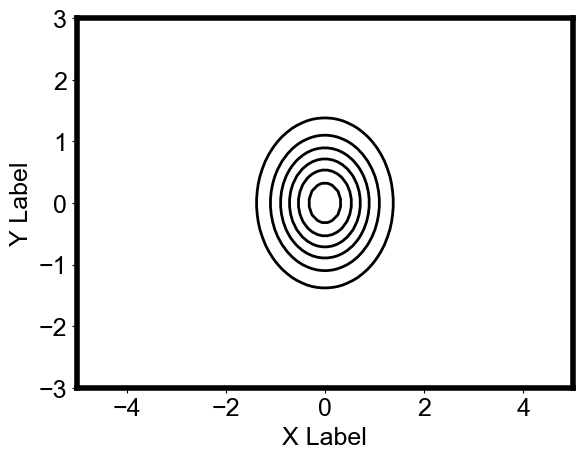

In [ ]:

# Generate some random data
x = np.linspace(-5, 5, 100)
y = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x, y)
Z = np.exp(-X**2 - Y**2)

# Create a contour plot with lines
plt.contour(X, Y, Z, colors='k', linewidths=2)

plt.xlabel('X Label')
plt.ylabel('Y Label')

plt.show()



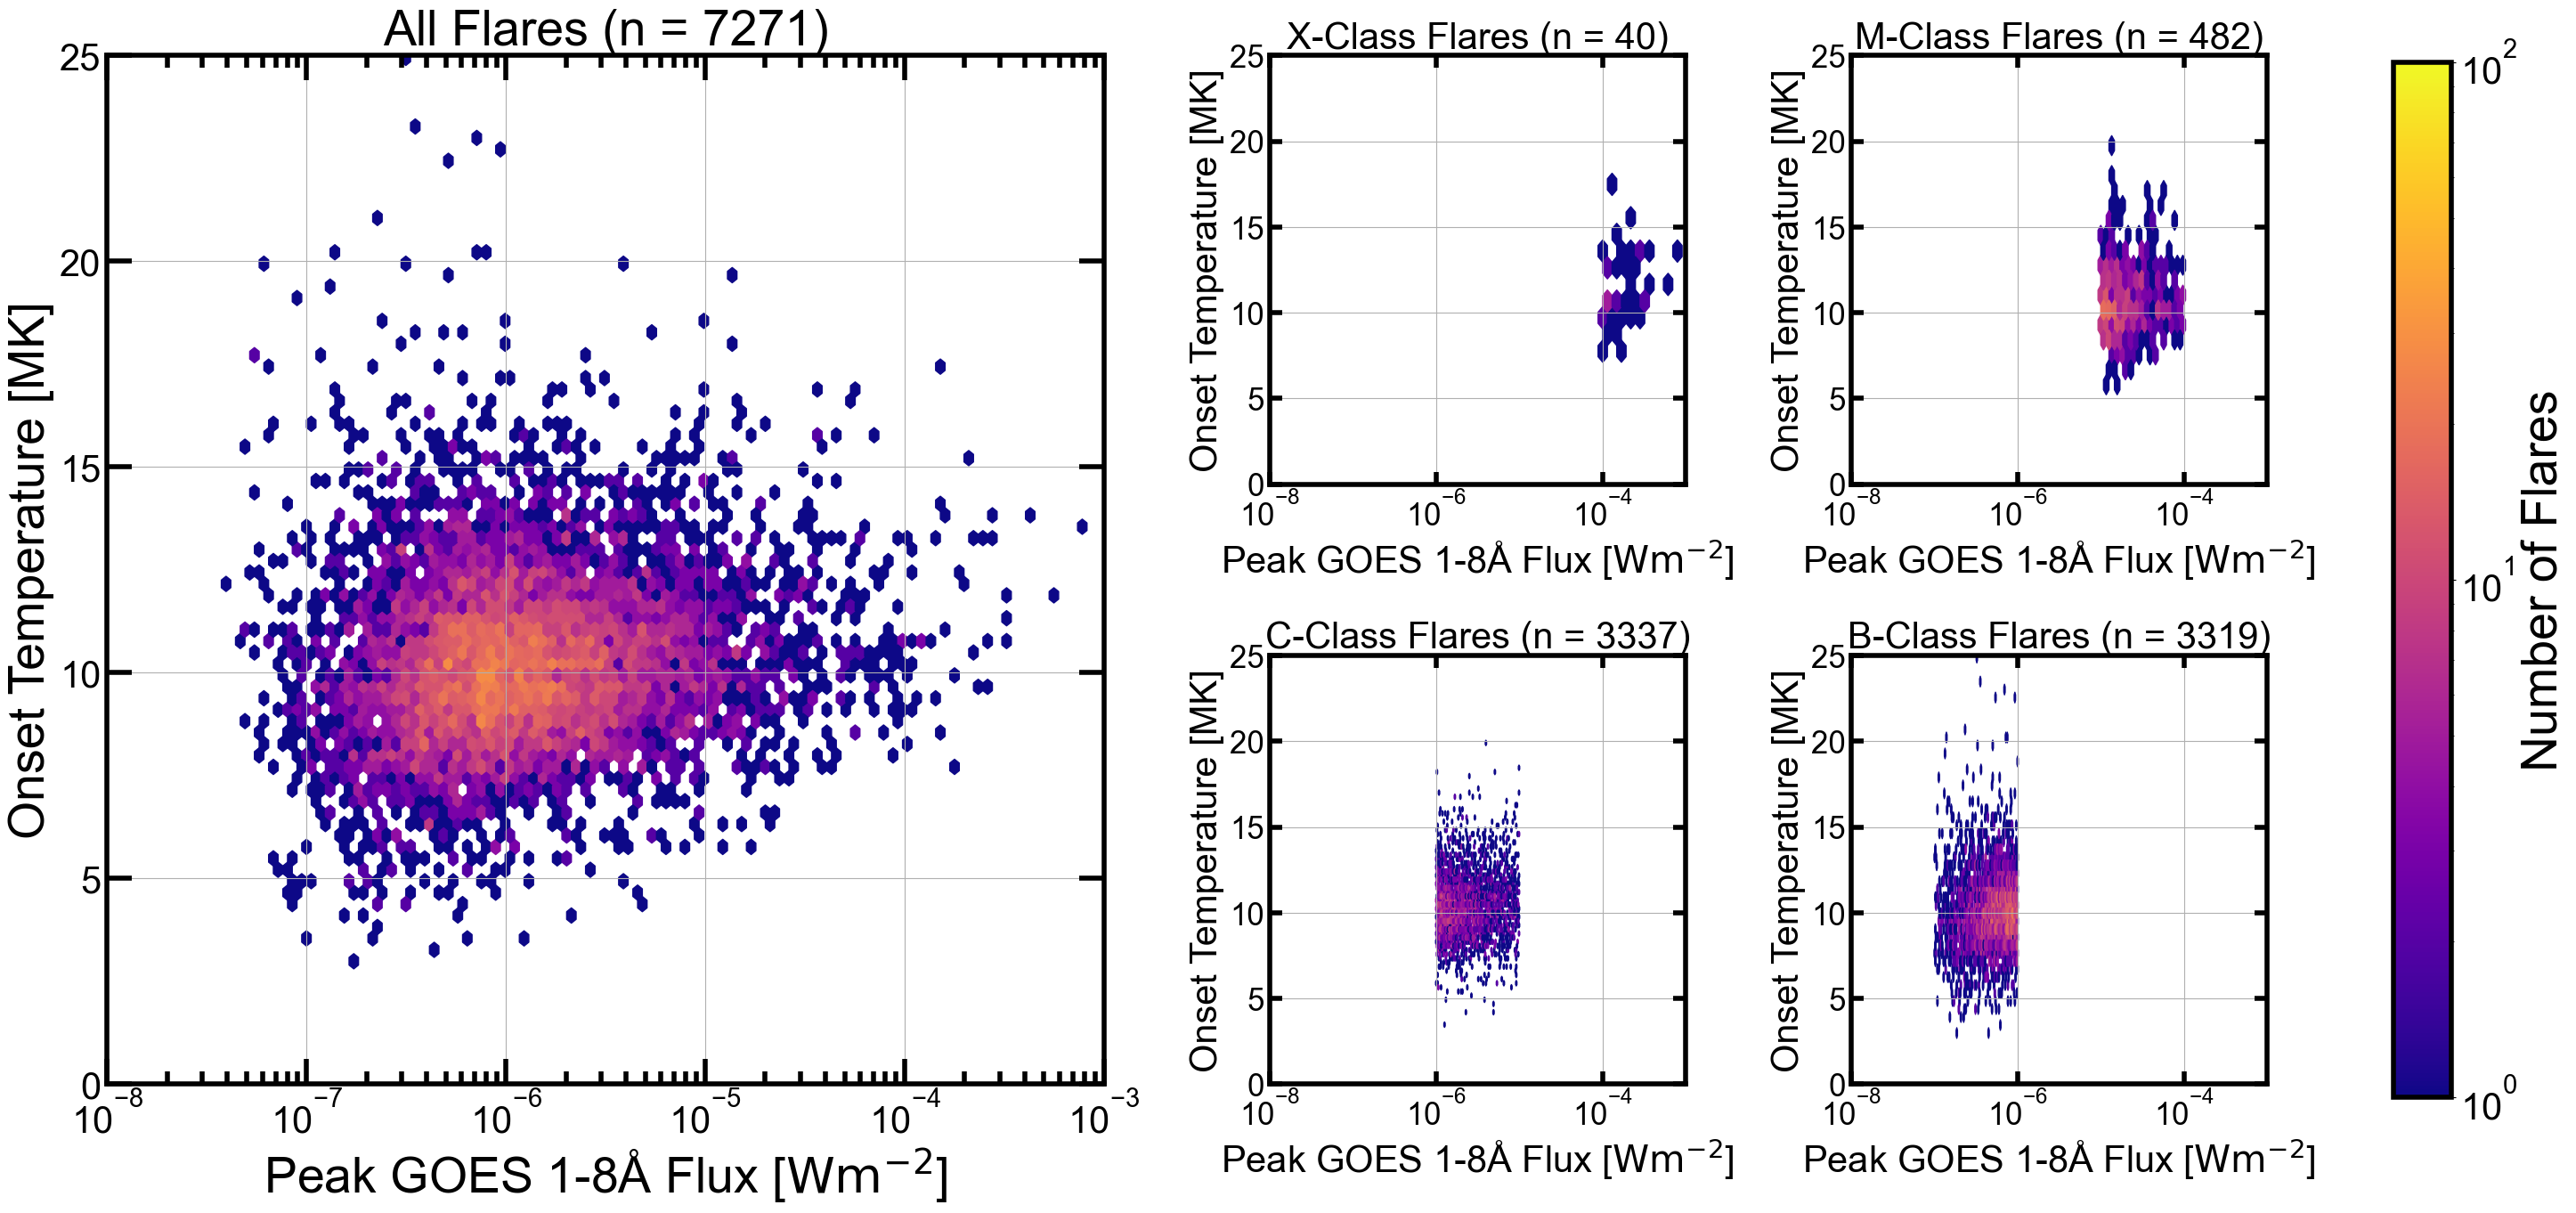

In [20]:
fig = plt.figure(figsize=(65, 15), linewidth = 3)
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular", 'axes.linewidth' : 4})

gs=GridSpec(2,8) 
#plt.suptitle("Onset Temperature Breakdown, by Class",x = 0.32, fontsize=60)

ax1=fig.add_subplot(gs[:,:2]) # First row, first column
total_no = len(full_data['Peak Flux'])
ax1.set_title(f"All Flares (n = {total_no})", fontsize = 40)
hb1 = ax1.hexbin(full_data['Peak Flux'], full_data['Temp 1/4'], xscale='log',
          gridsize=100, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
# plt.colorbar(hb1, ax = ax1)
ax1.set_ylabel("Onset Temperature [MK]", fontsize = 40)
ax1.set_xlabel("Peak GOES 1-8$\AA$ Flux [$\mathrm{Wm^{-2}}$]", fontsize = 40)
ax1.set_ylim([0,25])
ax1.set_xlim([1e-8, 1e-3])
ax1.tick_params('both', which='major', size=20, width=4, direction='in', top='on')
ax1.tick_params('both', which='minor', size=10, width=4, direction='in', top='on')
ax1.tick_params(which='major', size=20, width=4, direction='in', right='on')
ax1.tick_params(which='minor', size=10, width=4, direction='in', right='on')
ax1.tick_params(axis='x', labelsize=30, pad = 5)
ax1.tick_params(axis='y', labelsize=30, pad = 5)
ax1.grid()


ax2=fig.add_subplot(gs[0,2]) # First row, second column
x_no = len(full_data['Peak Flux'][full_data['Peak Flux'] >= 1e-4])
ax2.set_title(f"X-Class Flares (n = {x_no})", fontsize = 30)
hb2 = ax2.hexbin(full_data['Peak Flux'][full_data['Peak Flux'] >= 1e-4], full_data['Temp 1/4'][full_data['Peak Flux'] >= 1e-4], xscale='log',
          gridsize=10, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
# plt.colorbar(hb2, ax )
ax2.set_ylabel("Onset Temperature [MK]", fontsize = 30)
ax2.set_xlabel("Peak GOES 1-8$\AA$ Flux [$\mathrm{Wm^{-2}}$]", fontsize = 30)
ax2.set_ylim([0,25])
ax2.set_xlim([1e-8, 1e-3])
ax2.tick_params('both', which='major', size=10, width=4, direction='in', top='on')
ax2.tick_params('both', which='minor', size=5, width=4, direction='in', top='on')
ax2.tick_params(which='major', size=10, width=4, direction='in', right='on')
ax2.tick_params(which='minor', size=5, width=4, direction='in', right='on')
ax2.tick_params(axis='x', labelsize=25, pad = 5)
ax2.tick_params(axis='y', labelsize=25, pad = 5)
ax2.grid()

ax3=fig.add_subplot(gs[0,3]) # First row, third column
m_no = len(full_data['Peak Flux'][full_data['Peak Flux'] < 1e-4][full_data['Peak Flux'] >= 1e-5])
ax3.set_title(f"M-Class Flares (n = {m_no})", fontsize = 30)
hb3 = ax3.hexbin(full_data['Peak Flux'][full_data['Peak Flux'] < 1e-4][full_data['Peak Flux'] >= 1e-5], full_data['Temp 1/4'][full_data['Peak Flux'] < 1e-4][full_data['Peak Flux'] >= 1e-5], xscale='log',
          gridsize=15, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
# plt.colorbar(hb3)
ax3.set_ylabel("Onset Temperature [MK]", fontsize = 30)
ax3.set_xlabel("Peak GOES 1-8$\AA$ Flux [$\mathrm{Wm^{-2}}$]", fontsize =30)
ax3.set_ylim([0,25])
ax3.set_xlim([1e-8, 1e-3])
ax3.tick_params('both', which='major', size=10, width=4, direction='in', top='on')
ax3.tick_params('both', which='minor', size=5, width=4, direction='in', top='on')
ax3.tick_params(which='major', size=10, width=4, direction='in', right='on')
ax3.tick_params(which='minor', size=5, width=4, direction='in', right='on')
ax3.tick_params(axis='x', labelsize=25, pad = 5)
ax3.tick_params(axis='y', labelsize=25, pad = 5)
ax3.grid()


ax4=fig.add_subplot(gs[1,2])
c_no = len(full_data['Peak Flux'][full_data['Peak Flux'] < 1e-5][full_data['Peak Flux'] >= 1e-6])
ax4.set_title(f"C-Class Flares (n = {c_no})", fontsize = 30)
hb4 = ax4.hexbin(full_data['Peak Flux'][full_data['Peak Flux'] < 1e-5][full_data['Peak Flux'] >= 1e-6], full_data['Temp 1/4'][full_data['Peak Flux'] < 1e-5][full_data['Peak Flux'] >= 1e-6], xscale='log',
          gridsize=60, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
#plt.colorbar(hb4)
ax4.set_ylabel("Onset Temperature [MK]", fontsize = 30)
ax4.set_xlabel("Peak GOES 1-8$\AA$ Flux [$\mathrm{Wm^{-2}}$]", fontsize = 30)
ax4.set_ylim([0,25])
ax4.set_xlim([1e-8, 1e-3])
ax4.tick_params('both', which='major', size=10, width=4, direction='in', top='on')
ax4.tick_params('both', which='minor', size=5, width=4, direction='in', top='on')
ax4.tick_params(which='major', size=10, width=4, direction='in', right='on')
ax4.tick_params(which='minor', size=5, width=4, direction='in', right='on')
ax4.tick_params(axis='x', labelsize=25, pad = 5)
ax4.tick_params(axis='y', labelsize=25, pad = 5)
ax4.grid()


ax5=fig.add_subplot(gs[1,3]) # Second row, span all columns
b_no = len(full_data['Peak Flux'][full_data['Peak Flux'] < 1e-6][full_data['Peak Flux'] >= 1e-7])
ax5.set_title(f"B-Class Flares (n = {b_no})", fontsize = 30)
hb5 = ax5.hexbin(full_data['Peak Flux'][full_data['Peak Flux'] < 1e-6][full_data['Peak Flux'] >= 1e-7], full_data['Temp 1/4'][full_data['Peak Flux'] < 1e-6][full_data['Peak Flux'] >= 1e-7], xscale='log',
          gridsize=60, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
#plt.colorbar(hb5)
ax5.set_ylabel("Onset Temperature [MK]", fontsize = 30)
ax5.set_xlabel("Peak GOES 1-8$\AA$ Flux [$\mathrm{Wm^{-2}}$]", fontsize = 30)
ax5.set_ylim([0,25])
ax5.set_xlim([1e-8, 1e-3])
ax5.tick_params('both', which='major', size=10, width=4, direction='in', top='on')
ax5.tick_params('both', which='minor', size=5, width=4, direction='in', top='on')
ax5.tick_params(which='major', size=10, width=4, direction='in', right='on')
ax5.tick_params(which='minor', size=5, width=4, direction='in', right='on')
ax5.tick_params(axis='x', labelsize=25, pad = 5)
ax5.tick_params(axis='y', labelsize=25, pad = 5)
ax5.grid()


# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)
cbar_ax = fig.add_axes([0.52, 0.1, 0.01, 0.775])
fig.colorbar(hb1, cax=cbar_ax, pad = 3).set_label( label = "Number of Flares",size=40)
cbar_ax.tick_params(labelsize=30)
#plt.savefig("Presentation_Graphs/TEM_byclass_new.pdf", bbox_inches = 'tight',pad_inches = 0)
# show the plot
plt.show()

In [21]:
plt.rcParams.update({ 'axes.linewidth' : 2})

In [22]:
thresh_temp10 = full_data['Temp 1/4'][full_data['Temp 1/4'] >= 10]
thresh_temp8 = full_data['Temp 1/4'][full_data['Temp 1/4'] >= 7]
print(len(thresh_temp10)/len(full_data)*100)
print(len(thresh_temp8)/len(full_data)*100)
print(len(full_data))



53.14262137257598
96.54793013340668
7271


c:\Users\William\Documents\University\MastersProj\hot_onsets\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\William\Documents\University\MastersProj\hot_onsets\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


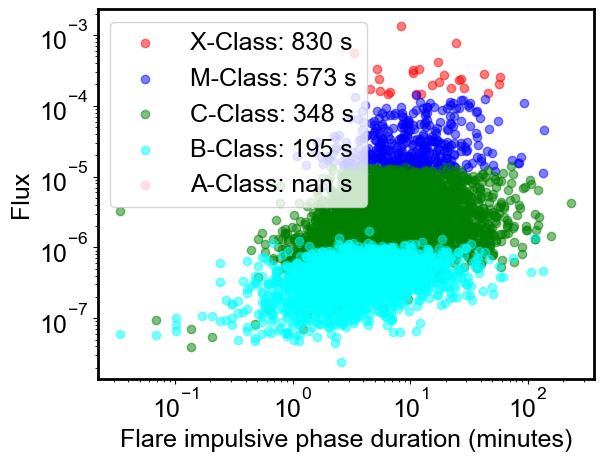

In [23]:
full_data['Flare Length'] = (full_data['Tdelta 1/2'])*2
X_avg_len = np.median(full_data['Flare Length'][full_data['fl_goescls'].astype(str).str.contains("X")])
M_avg_len = np.median(full_data['Flare Length'][full_data['fl_goescls'].astype(str).str.contains("M")])
C_avg_len = np.median(full_data['Flare Length'][full_data['fl_goescls'].astype(str).str.contains("C")])
B_avg_len = np.median(full_data['Flare Length'][full_data['fl_goescls'].astype(str).str.contains("B")])
A_avg_len = np.median(full_data['Flare Length'][full_data['fl_goescls'].astype(str).str.contains("A")])
plt.scatter(full_data['Flare Length'][full_data['fl_goescls'].astype(str).str.contains("X")]/60, full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("X")], alpha = 0.5, color = 'red', label = f'X-Class: {X_avg_len:.0f} s')
plt.scatter(full_data['Flare Length'][full_data['fl_goescls'].astype(str).str.contains("M")]/60, full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("M")], alpha = 0.5,color = 'blue', label = f'M-Class: {M_avg_len:.0f} s')
plt.scatter(full_data['Flare Length'][full_data['fl_goescls'].astype(str).str.contains("C")]/60, full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("C")], alpha = 0.5,color = 'green', label = f'C-Class: {C_avg_len:.0f} s')
plt.scatter(full_data['Flare Length'][full_data['fl_goescls'].astype(str).str.contains("B")]/60, full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("B")], alpha = 0.5,color = 'cyan', label = f'B-Class: {B_avg_len:.0f} s')
plt.scatter(full_data['Flare Length'][full_data['fl_goescls'].astype(str).str.contains("A")]/60, full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("A")], alpha = 0.5,color = 'pink', label = f'A-Class: {A_avg_len:.0f} s')
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Flare impulsive phase duration (minutes)")
plt.ylabel("Flux")
plt.legend()
#plt.ylim([1e-9,1e-3])
plt.show()

### Looking at Overlap
Difference between flare peak temp and onset temp vs EM

In [25]:
plt.rcParams.update({ 'axes.linewidth' : 2})
T_diff = (full_data['Peak Temp Long'][full_data["Peak Temp Long"] <= 20][full_data["Flare Max Temp"] <= 20].values - full_data["Temp 1/4"][full_data["Peak Temp Long"] <= 20][full_data["Flare Max Temp"] <=20].values)#[(full_data['Flare Max Temp'].values - full_data['Temp 1/4'].values) > 0]
T_diff_max = (full_data['Flare Max Temp'][full_data["Peak Temp Long"] <= 20][full_data["Flare Max Temp"] <= 20].values - full_data['Temp 1/4'][full_data["Peak Temp Long"] <= 20][full_data["Flare Max Temp"] <= 20].values)#[(full_data['Flare Max Temp'].values - full_data['Temp 1/4'].values) > 0]
Peak_flux = full_data['Peak Flux'][full_data["Peak Temp Long"] <= 20][full_data["Flare Max Temp"] <= 20].values#[(full_data['Flare Max Temp'].values - full_data['Temp 1/4'].values) > 0]

fig= plt.figure(figsize=(12, 7))
fig.suptitle(f'')
fig.tight_layout()

ax2 = fig.add_subplot(1, 2, 1)
hbl = ax2.hexbin(Peak_flux, T_diff, xscale='log',
          gridsize=100, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
ax2.set_xlabel("GOES 1-8$\;\AA$ Peak Flux [$Wm^{-2}$]",fontsize = 16)
ax2.set_ylabel("Difference of Peak and Onset Temperature [MK]", fontsize = 16)
ax2.set_ylim([-15,15])
ax2.set_xlim([1e-8, 1e-3])
ax2.yaxis.set_major_locator(ticker.AutoLocator())
ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
ax2.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax2.tick_params(which='major', size=10, width=2, direction='in', right='on')
ax2.tick_params(which='minor', size=5, width=2, direction='in', right='on')
ax2.tick_params(axis='x', labelsize=15, pad = 5)
ax2.tick_params(axis='y', labelsize=15, pad = 5)
ax2.grid()

ax4 = fig.add_subplot(1, 2, 2)
hbr = ax4.hexbin(Peak_flux, T_diff_max, xscale='log',
          gridsize=100, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
ax4.set_xlabel("GOES 1-8$\;\AA$ Peak Flux [$Wm^{-2}$]",fontsize = 16)
ax4.set_ylabel("Difference of Maximum and Onset Temperature [MK]", fontsize = 16)
ax4.set_ylim([-15,15])
ax4.set_xlim([1e-8, 1e-3])
ax4.yaxis.set_major_locator(ticker.AutoLocator())
ax4.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax4.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
ax4.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax4.tick_params(which='major', size=10, width=2, direction='in', right='on')
ax4.tick_params(which='minor', size=5, width=2, direction='in', right='on')
ax4.tick_params(axis='x', labelsize=15, pad = 5)
ax4.tick_params(axis='y', labelsize=15, pad = 5)
ax4.grid()

plt.tight_layout()
plt.subplots_adjust(wspace = 0.3, hspace = 0)
cbar_ax = fig.add_axes([1, 0.175, 0.02, 0.73])
fig.colorbar(hbr, cax=cbar_ax, pad = 3).set_label( label = "Number of Flares",size=16)
cbar_ax.tick_params(labelsize=14)
#plt.savefig("Presentation_Graphs/Temp_Differences.pdf", bbox_inches = 'tight',pad_inches = 0)
plt.show()

In [26]:
print(len(T_diff))
print(len(T_diff[T_diff <0]))
print(len(T_diff[T_diff <0])/len(T_diff) * 100)

print(len(T_diff_max))
print(len(T_diff_max[T_diff_max <0]))
print(100 - (len(T_diff_max[T_diff_max <0])/len(T_diff_max) * 100))

7247
3625
50.02069821995308
7247
1415
80.47467917759073


C:\Users\William\AppData\Local\Temp\ipykernel_16536\2056681237.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


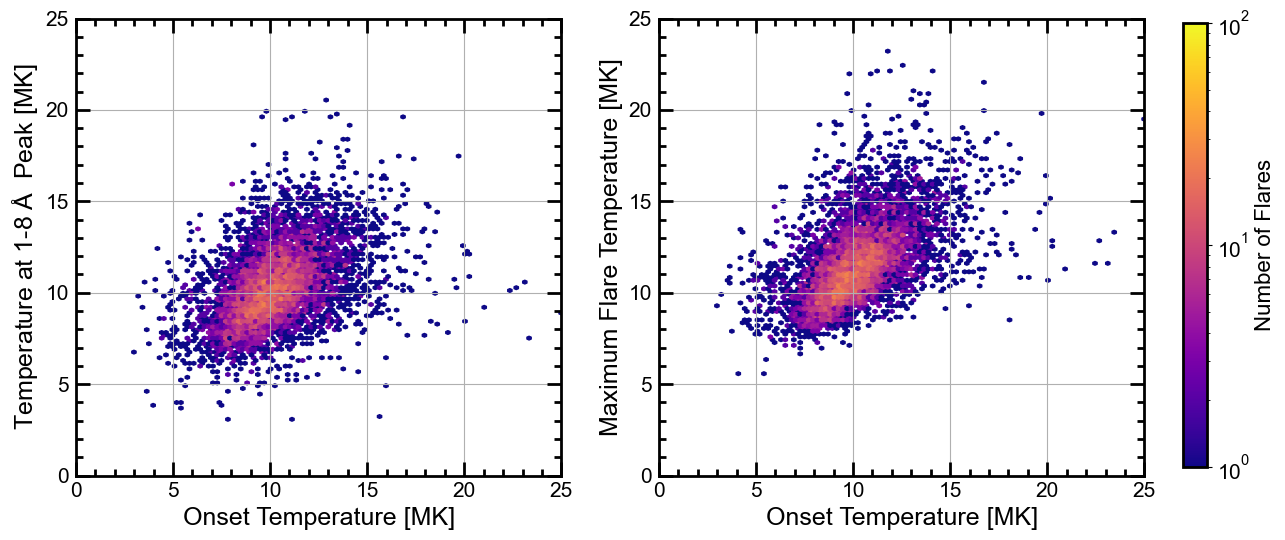

In [27]:
# #[full_data['Proximity Flag'] == False][full_data['Onset Flag'] == False][full_data['Background Flag'] == False]
T_diff = (full_data['Peak Temp Long'].values - full_data["Temp 1/4"].values)#[(full_data['Flare Max Temp'].values - full_data['Temp 1/4'].values) > 0]
T_diff_max = (full_data['Flare Max Temp'].values - full_data['Temp 1/4'].values)#[(full_data['Flare Max Temp'].values - full_data['Temp 1/4'].values) > 0]
#EM is prop to flux so: 
#Peak_EM = full_data['Peak EM Long'].values*1e-49
Peak_flux = full_data['Peak Flux'].values#[(full_data['Flare Max Temp'].values - full_data['Temp 1/4'].values) > 0]

fig= plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace = 0.25, hspace = 0)
fig.suptitle(f'')
fig.tight_layout()


ax2 = fig.add_subplot(1, 2, 1)
# ax2.set_title("Peak - onset temp hexbin")
hbpeak = ax2.hexbin(full_data["Temp 1/4"][full_data["Temp 1/4"] <=25][full_data["Peak Temp Long"] <=25].values, full_data['Peak Temp Long'][full_data["Temp 1/4"] <=25][full_data["Peak Temp Long"] <=25].values,
          gridsize=100, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
ax2.set_xlabel("Onset Temperature [MK]")
ax2.set_ylabel("Temperature at 1-8$\;\AA\;$ Peak [MK]")
ax2.set_ylim([0,25])
ax2.set_xlim([0,25])
ax2.yaxis.set_major_locator(ticker.AutoLocator())
ax2.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2.xaxis.set_major_locator(ticker.AutoLocator())
ax2.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax2.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
ax2.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax2.tick_params(which='major', size=10, width=2, direction='in', right='on')
ax2.tick_params(which='minor', size=5, width=2, direction='in', right='on')
ax2.tick_params(axis='x', labelsize=15, pad = 5)
ax2.tick_params(axis='y', labelsize=15, pad = 5)
ax2.grid()


ax4 = fig.add_subplot(1, 2, 2)
hbmax = ax4.hexbin(full_data["Temp 1/4"][full_data["Temp 1/4"] <=25][full_data["Flare Max Temp"] <=25].values, full_data['Flare Max Temp'][full_data["Temp 1/4"] <=25][full_data["Flare Max Temp"] <=25].values,
          gridsize=100, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
ax4.set_xlabel("Onset Temperature [MK]")
ax4.set_ylabel("Maximum Flare Temperature [MK]")
ax4.set_ylim([0,25])
ax4.set_xlim([0, 25])
ax4.yaxis.set_major_locator(ticker.AutoLocator())
ax4.yaxis.set_minor_locator(ticker.AutoMinorLocator())
ax4.xaxis.set_major_locator(ticker.AutoLocator())
ax4.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax4.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
ax4.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
ax4.tick_params(which='major', size=10, width=2, direction='in', right='on')
ax4.tick_params(which='minor', size=5, width=2, direction='in', right='on')
ax4.tick_params(axis='x', labelsize=15, pad = 5)
ax4.tick_params(axis='y', labelsize=15, pad = 5)
ax4.grid()

cbar_ax = fig.add_axes([1, 0.15, 0.02, 0.74])
fig.colorbar(hbmax, cax=cbar_ax, pad = 3).set_label( label = "Number of Flares",size=16)
cbar_ax.tick_params(labelsize=15)


plt.tight_layout()
#plt.savefig("Presentation_Graphs/Temp_correlation.pdf", bbox_inches = 'tight',pad_inches = 0)
plt.show()

In [ ]:
# indices = np.where((T_diff < 0))

# selected_rows = full_data.iloc[indices]

# selected_rows.to_csv("CHECK.csv")

### Splitting up the Fancy Onset and Peak TEM by flare class

In [ ]:
full_data['Tdiff'] = full_data['Peak Temp Long'] - full_data['Temp 1/4']

fig= plt.figure(figsize=(8, 8))
fig.suptitle(f'Flare Onset Temperature Difference, by Flare Class')
fig.tight_layout()

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("X-Class events")
ax1.hexbin(full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("X")].values, full_data['Tdiff'][full_data['fl_goescls'].astype(str).str.contains("X")].values, xscale='log',
          gridsize=10, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
ax1.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
ax1.set_ylabel("Peak - Onset Temperature [MK]")
ax1.set_ylim([-20,20])
ax1.set_xlim([1e-8, 1e-3])
ax1.grid()

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title("Flare Onset Temp difference Hexbin")
ax2.hexbin(full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("M")], full_data['Tdiff'][full_data['fl_goescls'].astype(str).str.contains("M")], xscale='log',
          gridsize=20, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
ax2.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
ax2.set_ylabel("Peak - Onset Temperature [MK]")
ax2.set_ylim([-20,20])
ax2.set_xlim([1e-8, 1e-3])
ax2.grid()

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title("Flare Onset Temp difference Hexbin")
ax3.hexbin(full_data['Peak Flux'][full_data['fl_goescls'].astype(str).str.contains("C")], full_data['Tdiff'][full_data['fl_goescls'].astype(str).str.contains("C")], xscale='log',
          gridsize=135, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
ax3.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
ax3.set_ylabel("Peak - Onset Temperature [MK]")
ax3.set_ylim([-20,20])
ax3.set_xlim([1e-8, 1e-3])
ax3.grid()

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title("Flare Onset Temp difference Hexbin")
ax4.hexbin(full_data['Peak Flux'][full_data0['fl_goescls'].astype(str).str.contains("B")], full_data['Tdiff'][full_data['fl_goescls'].astype(str).str.contains("B")], xscale='log',
          gridsize=75, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
ax4.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
ax4.set_ylabel("Peak - Onset Temperature [MK]")
ax4.set_ylim([-20,20])
ax4.set_xlim([1e-8, 1e-3])
ax4.grid()

plt.tight_layout()
plt.show()

plt.minorticks_on()
plt.savefig("Presentation_Graphs/TEM_byclass.pdf", bbox_inches = 'tight',pad_inches = 0)

In [ ]:
x_temp = []
x_em = []
x_peakt = []
x_peakem = []
m_temp = []
m_em = []
m_peakt = []
m_peakem = []
c_temp = []
c_em = []
c_peakt = []
c_peakem = []
b_temp = []
b_em = []
b_peakt = []
b_peakem = []

for index, row in full_data.iterrows():
    fl_class = row['fl_goescls'][0]
    temps_ons = row['Temp 1/6']
    ems_ons = row['EM 1/6']
    temps_max = row['Flare Max Temp']
    ems_max = row['Flare Max EM']

    if fl_class == "X":
        x_temp.append(temps_ons)
        x_em.append(ems_ons)
        x_peakt.append(temps_max)
        x_peakem.append(ems_max)
    elif fl_class == "M":
        m_temp.append(temps_ons)
        m_em.append(ems_ons)
        m_peakt.append(temps_max)
        m_peakem.append(ems_max)
    elif fl_class == "C":
        c_temp.append(temps_ons)
        c_em.append(ems_ons)
        c_peakt.append(temps_max)
        c_peakem.append(ems_max)
    elif fl_class == "B":
        b_temp.append(temps_ons)
        b_em.append(ems_ons)
        b_peakt.append(temps_max)
        b_peakem.append(ems_max)

x_em = [1e-49 * x if not np.isnan(x) else x for x in x_em]
x_peakem = [1e-49 * x if not np.isnan(x) else x for x in x_peakem]
m_em = [1e-49 * x if not np.isnan(x) else x for x in m_em]
m_peakem = [1e-49 * x if not np.isnan(x) else x for x in m_peakem]
c_em = [1e-49 * x if not np.isnan(x) else x for x in c_em]
c_peakem = [1e-49 * x if not np.isnan(x) else x for x in c_peakem]
b_em = [1e-49 * x if not np.isnan(x) else x for x in b_em]
b_peakem = [1e-49 * x if not np.isnan(x) else x for x in b_peakem]

print(len(x_em))
print(len(m_em))
print(len(c_em))
print(len(b_em))

25
386
4544
2249


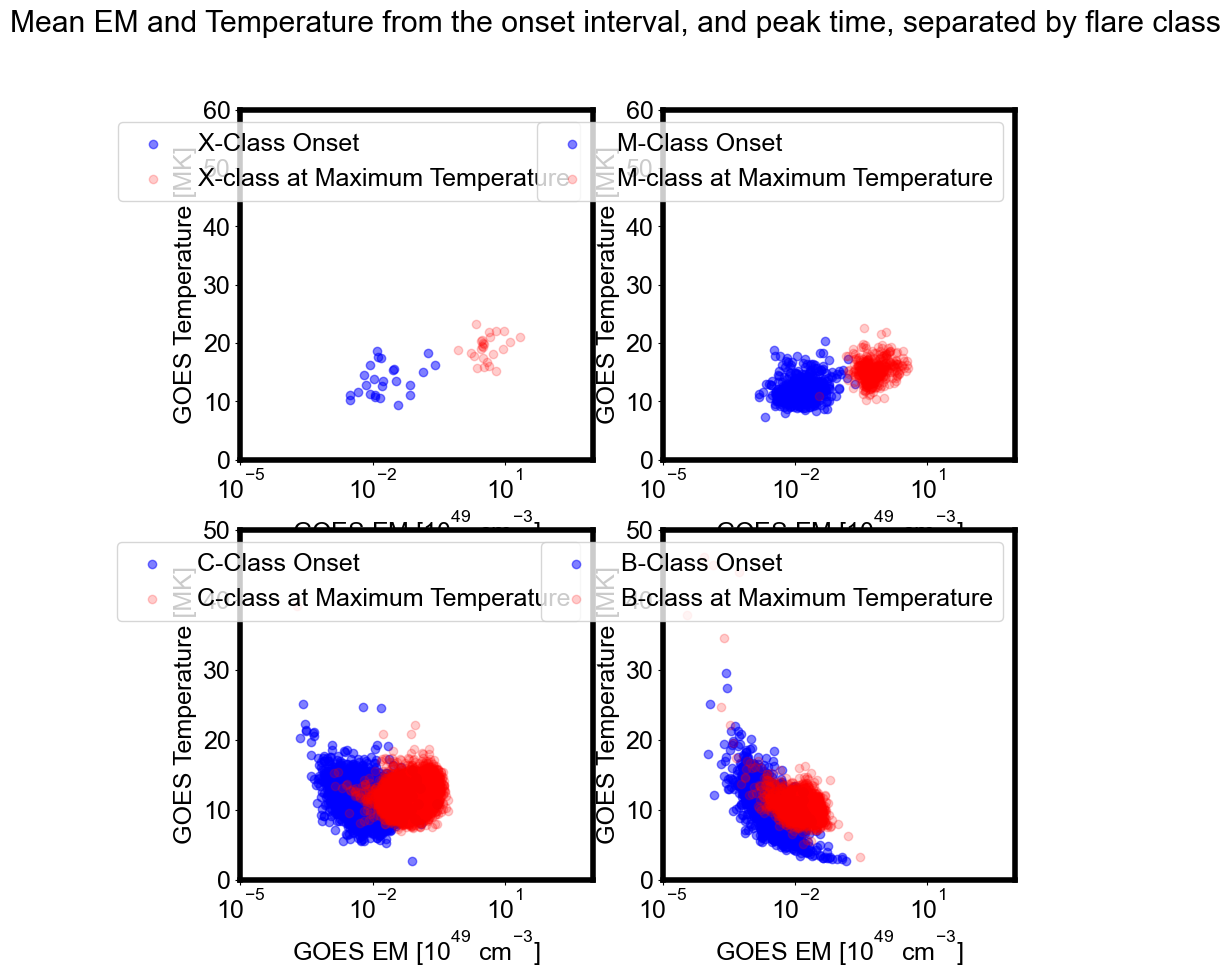

In [ ]:
fig= plt.figure(figsize=(10, 10))
fig.suptitle(f'Mean EM and Temperature from the onset interval, and peak time, separated by flare class')
fig.tight_layout()

# ax1 = fig.add_subplot(3, 2, 1)
# ax1.set_xscale("log")
# ax1.scatter(full_data["Fancy EM"].values*1e-49,full_data['Fancy Temp'].values, marker = None,color = 'blue', alpha = 0.5, label = "Fancy Onset")
# ax1.scatter(full_data['Peak EM Long'].values*1e-49,full_data['Peak Temp Long'].values, marker = None,color = 'red', alpha = 0.2, label = "Peak")
# ax1.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
# ax1.set_ylabel("GOES Temperature [MK]")
# ax1.set_ylim([0,60])
# ax1.set_xlim([1e-5, 1e3])
# ax1.legend()

ax2 = fig.add_subplot(2, 2, 1)
ax2.set_xscale("log")
ax2.scatter(x_em,x_temp, marker = None,color = 'blue', alpha = 0.5, label = "X-Class Onset")
ax2.scatter(x_peakem,x_peakt, marker = None,color = 'red', alpha = 0.2, label = "X-class at Maximum Temperature")
ax2.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
ax2.set_ylabel("GOES Temperature [MK]")
ax2.set_ylim([0,60])
ax2.set_xlim([1e-5, 1e3])
ax2.legend()

ax3 = fig.add_subplot(2, 2, 2)
ax3.set_xscale("log")
ax3.scatter(m_em,m_temp, marker = None,color = 'blue', alpha = 0.5, label = "M-Class Onset")
ax3.scatter(m_peakem,m_peakt, marker = None,color = 'red', alpha = 0.2, label = "M-class at Maximum Temperature")
ax3.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
ax3.set_ylabel("GOES Temperature [MK]")
ax3.set_ylim([0,60])
ax3.set_xlim([1e-5, 1e3])
ax3.legend()

ax4 = fig.add_subplot(2, 2, 3)
ax4.set_xscale("log")
ax4.scatter(c_em,c_temp, marker = None,color = 'blue', alpha = 0.5, label = "C-Class Onset")
ax4.scatter(c_peakem,c_peakt, marker = None,color = 'red', alpha = 0.2, label = "C-class at Maximum Temperature")
ax4.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
ax4.set_ylabel("GOES Temperature [MK]")
ax4.set_ylim([0,50])
ax4.set_xlim([1e-5, 1e3])
ax4.legend()

ax5 = fig.add_subplot(2, 2, 4)
ax5.set_xscale("log")
ax5.scatter(b_em,b_temp, marker = None,color = 'blue', alpha = 0.5, label = "B-Class Onset")
ax5.scatter(b_peakem,b_peakt, marker = None,color = 'red', alpha = 0.2, label = "B-class at Maximum Temperature")
ax5.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
ax5.set_ylabel("GOES Temperature [MK]")
ax5.set_ylim([0,50])
ax5.set_xlim([1e-5, 1e3])
ax5.legend()

plt.show()

## Looking at Onset Length

<Figure size 640x480 with 0 Axes>

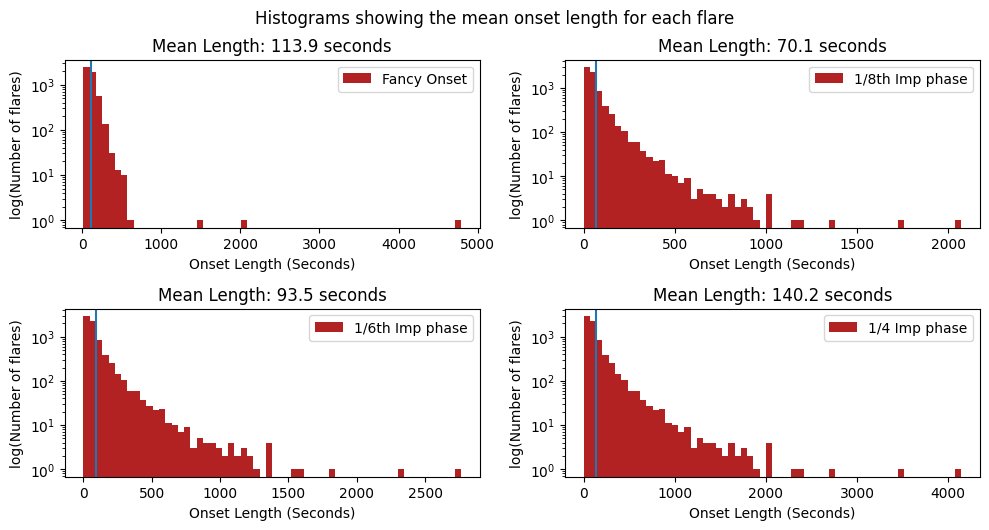

In [ ]:
plt.rcdefaults()
plt.tight_layout()
fig= plt.figure(figsize=(10, 10))
# fig.suptitle(f'Mean EM and Temperature from the onset interval, and the EM and Temp at the peak time. All GOES-15 Flares')
fig.suptitle('Histograms showing the mean onset length for each flare')

ax1 = fig.add_subplot(4, 2, 1)
ax1.hist(full_data["Fancy Tdelta"][full_data['Onset Flag'] == False].values, bins = 60, color = 'firebrick', label = 'Fancy Onset')
ax1.set_yscale("log")
ax1.set_xlabel("Onset Length (Seconds)")
ax1.set_ylabel("log(Number of flares)")
ax1.set_title("Mean Length: {0:.1f} seconds".format(np.nanmean(full_data["Fancy Tdelta"][full_data['Onset Flag'] == False].values)))
ax1.axvline(np.nanmean(full_data["Fancy Tdelta"][full_data['Onset Flag'] == False].values))
plt.legend()
plt.tight_layout()

ax2 = fig.add_subplot(4, 2, 2)
ax2.hist(full_data['Tdelta 1/8'].values, bins = 60, color = 'firebrick', label = '1/8th Imp phase')
ax2.set_yscale("log")
ax2.set_xlabel("Onset Length (Seconds)")
ax2.set_ylabel("log(Number of flares)")
ax2.set_title("Mean Length: {0:.1f} seconds".format(np.nanmean(full_data['Tdelta 1/8'].values)))
ax2.axvline(np.nanmean(full_data['Tdelta 1/8'].values))
plt.legend()
plt.tight_layout()

ax3 = fig.add_subplot(4, 2, 3)
ax3.hist(full_data['Tdelta 1/6'].values, bins = 60, color = 'firebrick', label = '1/6th Imp phase')
ax3.set_yscale("log")
ax3.set_xlabel("Onset Length (Seconds)")
ax3.set_ylabel("log(Number of flares)")
ax3.set_title("Mean Length: {0:.1f} seconds".format(np.nanmean(full_data['Tdelta 1/6'].values)))
ax3.axvline(np.nanmean(full_data['Tdelta 1/6'].values))
plt.legend()
plt.tight_layout()

ax4 = fig.add_subplot(4, 2, 4)
ax4.hist(full_data['Tdelta 1/4'].values, bins = 60, color = 'firebrick', label = '1/4 Imp phase')
ax4.set_yscale("log")
ax4.set_xlabel("Onset Length (Seconds)")
ax4.set_ylabel("log(Number of flares)")
ax4.set_title("Mean Length: {0:.1f} seconds".format(np.nanmean(full_data['Tdelta 1/4'].values)))
ax4.axvline(np.nanmean(full_data['Tdelta 1/4'].values))
plt.legend()
plt.tight_layout()

## Looking at the Location of flares on the solar disk

### 1. Figuring out the coordinate system

In [ ]:
hgc_x = full_data['hgc_x']
hgc_y = full_data['hgc_y']
hpc_x = full_data['hpc_x']
hpc_y = full_data['hpc_y']
hgs_x = full_data['hgs_x']
hgs_y = full_data['hgs_y']

<Figure size 640x480 with 0 Axes>

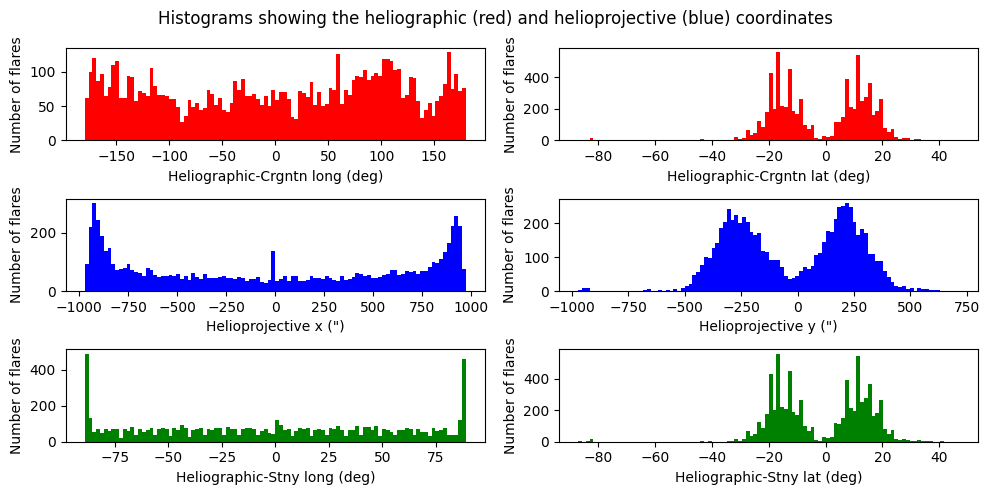

In [ ]:
plt.rcdefaults()
plt.tight_layout()
fig= plt.figure(figsize=(10, 5))
# fig.suptitle(f'Mean EM and Temperature from the onset interval, and the EM and Temp at the peak time. All GOES-15 Flares')
fig.suptitle('Histograms showing the heliographic (red) and helioprojective (blue) coordinates')

ax1 = fig.add_subplot(3, 2, 1)
ax1.hist(hgc_x, bins = 100, color = 'red')
ax1.set_xlabel("Heliographic-Crgntn long (deg)")
ax1.set_ylabel("Number of flares")
plt.tight_layout()

ax2 = fig.add_subplot(3, 2, 2)
ax2.hist(hgc_y, bins = 100, color = 'red')
ax2.set_xlabel("Heliographic-Crgntn lat (deg)")
ax2.set_ylabel("Number of flares")
plt.tight_layout()

ax3 = fig.add_subplot(3, 2, 3)
ax3.hist(hpc_x, bins = 100, color = 'blue')
ax3.set_xlabel("Helioprojective x (\")")
ax3.set_ylabel("Number of flares")
plt.tight_layout()

ax4 = fig.add_subplot(3, 2, 4)
ax4.hist(hpc_y, bins = 100, color = 'blue')
ax4.set_xlabel("Helioprojective y (\")")
ax4.set_ylabel("Number of flares")
plt.tight_layout()

ax5 = fig.add_subplot(3, 2, 5)
ax5.hist(hgs_x, bins = 100, color = 'green')
ax5.set_xlabel("Heliographic-Stny long (deg)")
ax5.set_ylabel("Number of flares")
plt.tight_layout()

ax6 = fig.add_subplot(3, 2, 6)
ax6.hist(hgs_y, bins = 100, color = 'green')
ax6.set_xlabel("Heliographic-Stny lat (deg)")
ax6.set_ylabel("Number of flares")
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

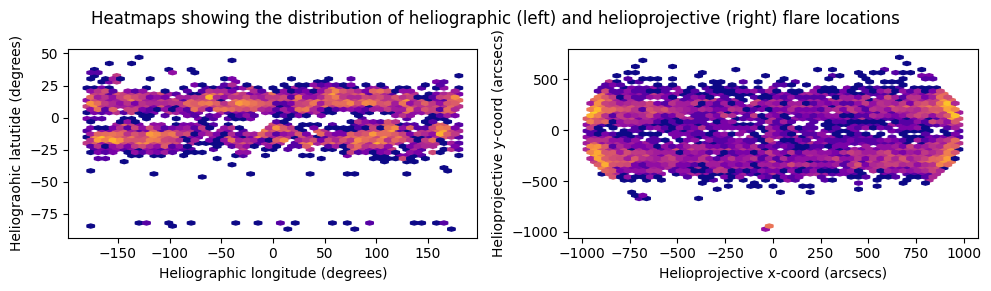

In [ ]:
plt.rcdefaults()
plt.tight_layout()
fig= plt.figure(figsize=(10, 5))
# fig.suptitle(f'Mean EM and Temperature from the onset interval, and the EM and Temp at the peak time. All GOES-15 Flares')
fig.suptitle('Heatmaps showing the distribution of heliographic (left) and helioprojective (right) flare locations')

ax1 = fig.add_subplot(2, 2, 1)
ax1.hexbin(hgc_x, hgc_y,
          gridsize=50, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
#ax1.set_yscale("log")
ax1.set_xlabel("Heliographic longitude (degrees)")
ax1.set_ylabel("Heliograohic latutide (degrees)")
plt.tight_layout()

ax2 = fig.add_subplot(2, 2, 2)
ax2.hexbin(hpc_x, hpc_y,
          gridsize=50, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))
#ax1.set_yscale("log")
ax2.set_xlabel("Helioprojective x-coord (arcsecs)")
ax2.set_ylabel("Helioprojective y-coord (arcsecs)")
plt.tight_layout()

plt.show()

### 1. HelioProjective Coords

In [ ]:
fig = plt.subplots(figsize=(5, 5))
plt.scatter(full_data['hpc_x'],full_data['hpc_y'])
plt.xlim([-1000,1000])
plt.ylim([-1000,1000])
plt.ylabel('Helioprojective Latitude')
plt.xlabel('Helioprojective Longitude')
plt.show()

In [ ]:
full_data['hpc_r'] = np.sqrt(full_data['hpc_x']**2 + full_data['hpc_y']**2)
#full_data['sun_rad'] = sunpy.coordinates.sun.angular_radius(full_data['event_peaktime']).value

In [ ]:
plt.hist(full_data['hpc_x'], bins = 100)
plt.axvline(830, color = 'r')
plt.axvline(-830, color = 'r')
plt.xlabel("Helioprojective Longitude")
plt.show()

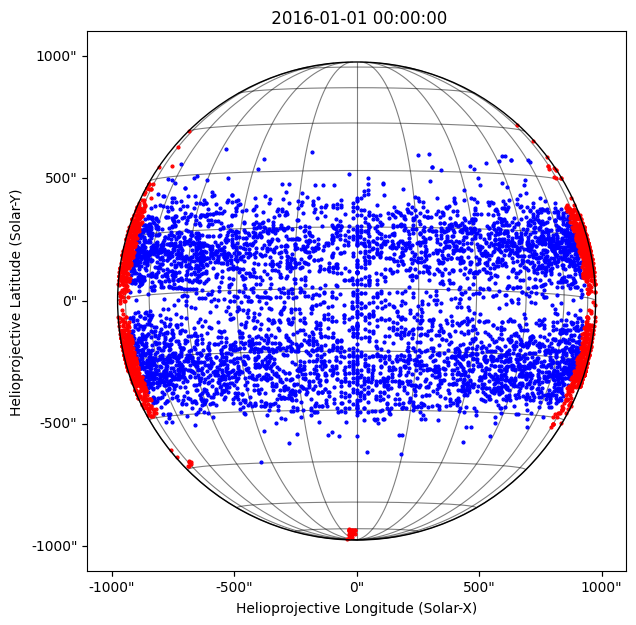

In [ ]:
full_data['hpc_r'] = np.sqrt(full_data['hpc_x']**2 + full_data['hpc_y']**2)
hgc_x_limbs = full_data['hgc_x'][full_data['hpc_r'] > 930]
hgc_y_limbs = full_data['hgc_y'][full_data['hpc_r'] > 930]

data = np.full((10, 10), np.nan)
skycoord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime='2016-01-01',
                    observer='earth', frame=frames.Helioprojective)
header = sunpy.map.make_fitswcs_header(data, skycoord, scale=[220, 220]*u.arcsec/u.pixel)

blank_map = sunpy.map.Map(data, header)
# coords = SkyCoord(full_data1['hpc_x']*u.arcsec, full_data1['hpc_y']*u.arcsec, frame=blank_map.coordinate_frame)
coords_nearl = SkyCoord(full_data['hpc_x'][full_data['hpc_r'] < 930]*u.arcsec, full_data['hpc_y'][full_data['hpc_r'] < 930]*u.arcsec, frame=blank_map.coordinate_frame)
coords_offl = SkyCoord(full_data['hpc_x'][full_data['hpc_r'] >= 930]*u.arcsec, full_data['hpc_y'][full_data['hpc_r'] >= 930]*u.arcsec, frame=blank_map.coordinate_frame)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection=blank_map)
blank_map.plot(axes=ax)
blank_map.draw_limb(axes=ax, color="k")
blank_map.draw_grid(axes=ax, color="k")
# pall = ax.plot_coord(coords, '.',color='blue',mew=2,ms=2)
pnear = ax.plot_coord(coords_nearl, '.',color='blue',mew=2,ms=2)
poff = ax.plot_coord(coords_offl, '.',color='red',mew=2,ms=2)
plt.show()


In [ ]:
# fig= plt.figure(figsize=(10, 10))
# # fig.suptitle(f'Mean EM and Temperature from the onset interval, and the EM and Temp at the peak time. All GOES-15 Flares')
# fig.suptitle(f'Mean Flux from onset interval and peak converted to T, EM. Excluding limb flares')

# ax1 = fig.add_subplot(4, 2, 1)
# ax1.set_xscale("log")
# ax1.scatter(full_data["Fancy EM"][full_data['on_limb'] == False].values*1e-49,full_data['Fancy Temp'][full_data['on_limb'] == False].values, marker = None,color = 'blue', alpha = 0.5, label = "Fancy Onset")
# ax1.scatter(full_data['Peak EM Long'][full_data['on_limb'] == False].values*1e-49,full_data['Peak Temp Long'][full_data['on_limb'] == False].values, marker = None,color = 'red', alpha = 0.2, label = "Peak")
# ax1.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
# ax1.set_ylabel("GOES Temperature [MK]")
# ax1.set_ylim([0,60])
# ax1.legend()


# ax2 = fig.add_subplot(4, 2, 2)
# ax2.set_xscale("log")
# ax2.scatter(full_data["EM 1/8"][full_data['on_limb'] == False].values*1e-49,full_data['Temp 1/8'][full_data['on_limb'] == False].values, marker = None,color = 'blue', alpha = 0.5, label = "1/8 Onset")
# ax2.scatter(full_data['Peak EM Long'][full_data['on_limb'] == False].values*1e-49,full_data['Peak Temp Long'][full_data['on_limb'] == False].values, marker = None,color = 'red', alpha = 0.2, label = "Peak")
# ax2.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
# ax2.set_ylabel("GOES Temperature [MK]")
# ax2.set_ylim([0,60])
# ax2.legend()

# ax3 = fig.add_subplot(4, 2, 3)
# ax3.set_xscale("log")
# ax3.scatter(full_data["EM 1/6"][full_data['on_limb'] == False].values*1e-49,full_data['Temp 1/6'][full_data['on_limb'] == False].values, marker = None,color = 'blue', alpha = 0.5, label = "1/6 Onset")
# ax3.scatter(full_data['Peak EM Long'][full_data['on_limb'] == False].values*1e-49,full_data['Peak Temp Long'][full_data['on_limb'] == False].values, marker = None,color = 'red', alpha = 0.2, label = "Peak")
# ax3.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
# ax3.set_ylabel("GOES Temperature [MK]")
# ax3.set_ylim([0,60])
# ax3.legend()

# ax4 = fig.add_subplot(4, 2, 4)
# ax4.set_xscale("log")
# ax4.scatter(full_data["EM 1/4"][full_data['on_limb'] == False].values*1e-49,full_data['Temp 1/4'][full_data['on_limb'] == False].values, marker = None,color = 'blue', alpha = 0.5, label = "1/4 Onset")
# ax4.scatter(full_data['Peak EM Long'][full_data['on_limb'] == False].values*1e-49,full_data['Peak Temp Long'][full_data['on_limb'] == False].values, marker = None,color = 'red', alpha = 0.2, label = "Peak")
# ax4.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
# ax4.set_ylabel("GOES Temperature [MK]")
# ax4.set_ylim([0,60])
# ax4.legend()

# ax5 = fig.add_subplot(4, 2, 5)
# ax5.set_xscale("log")
# ax5.scatter(full_data["EM 1/3"][full_data['on_limb'] == False].values*1e-49,full_data['Temp 1/3'][full_data['on_limb'] == False].values, marker = None,color = 'blue', alpha = 0.5, label = "1/3 Onset")
# ax5.scatter(full_data['Peak EM Long'][full_data['on_limb'] == False].values*1e-49,full_data['Peak Temp Long'][full_data['on_limb'] == False].values, marker = None,color = 'red', alpha = 0.2, label = "Peak")
# ax5.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
# ax5.set_ylabel("GOES Temperature [MK]")
# ax5.set_ylim([0,50])
# ax5.legend()

# ax6 = fig.add_subplot(4, 2, 6)
# ax6.set_xscale("log")
# ax6.scatter(full_data["EM 1/2"][full_data['on_limb'] == False].values*1e-49,full_data['Temp 1/2'][full_data['on_limb'] == False].values, marker = None,color = 'blue', alpha = 0.5, label = "1/2 Onset")
# ax6.scatter(full_data['Peak EM Long'][full_data['on_limb'] == False].values*1e-49,full_data['Peak Temp Long'][full_data['on_limb'] == False].values, marker = None,color = 'red', alpha = 0.2, label = "Peak")
# ax6.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
# ax6.set_ylabel("GOES Temperature [MK]")
# ax6.set_ylim([0,60])
# ax6.legend()

# ax7 = fig.add_subplot(4, 2, 7)
# ax7.set_xscale("log")
# ax7.scatter(full_data["EM 2/3"][full_data['on_limb'] == False].values*1e-49,full_data['Temp 2/3'][full_data['on_limb'] == False].values, marker = None,color = 'blue', alpha = 0.5, label = "2/3 Onset")
# ax7.scatter(full_data['Peak EM Long'][full_data['on_limb'] == False].values*1e-49,full_data['Peak Temp Long'][full_data['on_limb'] == False].values, marker = None,color = 'red', alpha = 0.2, label = "Peak")
# ax7.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
# ax7.set_ylabel("GOES Temperature [MK]")
# ax7.set_ylim([0,60])
# ax7.legend()

# ax8 = fig.add_subplot(4, 2, 8)
# ax8.set_xscale("log")
# ax8.scatter(full_data["EM 3/4"][full_data['on_limb'] == False].values*1e-49,full_data['Temp 3/4'][full_data['on_limb'] == False].values, marker = None,color = 'blue', alpha = 0.5, label = "3/4 Onset")
# ax8.scatter(full_data['Peak EM Long'][full_data['on_limb'] == False].values*1e-49,full_data['Peak Temp Long'][full_data['on_limb'] == False].values, marker = None,color = 'red', alpha = 0.2, label = "Peak")
# ax8.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
# ax8.set_ylabel("GOES Temperature [MK]")
# ax8.set_ylim([0,60])
# ax8.legend()

# plt.show()

In [ ]:
# fig= plt.figure(figsize=(10, 10))
# fig.suptitle(f'Mean Flux from onset interval and peak converted to T, EM. Excluding limb flares')
# fig.tight_layout()

# ax1 = fig.add_subplot(2, 2, 1)
# ax1.set_title("Flare Onset Hexbin plot: No limb flares")
# ax1.hexbin(full_data["Fancy EM"][full_data['on_limb'] == False].values*1e-49,
#           full_data['Fancy Temp'][full_data['on_limb'] == False].values, xscale='log',
#           gridsize=100, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))

# ax1.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
# ax1.set_ylabel("GOES Temperature [MK]")
# ax1.set_ylim([0,60])
# ax1.set_xlim([1e-5, 1e3])

# ax2 = fig.add_subplot(2, 2, 2)
# ax2.set_title("Flare Peak Hexbin plot: No limb flares")
# ax2.hexbin(full_data["Peak EM Long"][full_data['on_limb'] == False].values*1e-49,
#           full_data['Peak Temp Long'][full_data['on_limb'] == False].values, xscale='log',
#           gridsize=100, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))

# ax2.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
# ax2.set_ylabel("GOES Temperature [MK]")
# ax2.set_ylim([0,60])
# ax2.set_xlim([1e-5, 1e3])

# ax3 = fig.add_subplot(2, 2, 3)
# ax3.set_title("Flare Onset Hexbin plot:limb flares")
# ax3.hexbin(full_data["Fancy EM"][full_data['on_limb'] == True].values*1e-49,
#           full_data['Fancy Temp'][full_data['on_limb'] == True].values, xscale='log',
#           gridsize=100, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))

# ax3.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
# ax3.set_ylabel("GOES Temperature [MK]")
# ax3.set_ylim([0,60])
# ax3.set_xlim([1e-5, 1e3])

# ax4 = fig.add_subplot(2, 2, 4)
# ax4.set_title("Flare Peak Hexbin plot: limb flares")
# ax4.hexbin(full_data["Peak EM Long"][full_data['on_limb'] == True].values*1e-49,
#           full_data['Peak Temp Long'][full_data['on_limb'] == True].values, xscale='log',
#           gridsize=100, cmap='plasma', norm=matplotlib.colors.LogNorm(vmin=1, vmax=100))

# ax4.set_xlabel("GOES EM [$10^{49}\;cm^{-3}$]")
# ax4.set_ylabel("GOES Temperature [MK]")
# ax4.set_ylim([0,60])
# ax4.set_xlim([1e-5, 1e3])

# plt.show()

### 2. Heliographic-Carrington coords

In [ ]:
# Convert the HGC coordinates to Cartesian coordinates
phi = np.radians(hgc_x) + np.pi  # Convert longitude to radians and shift by pi to set central meridian to x-axis
theta = np.radians(hgc_y) + np.pi/2  # Convert latitude to radians and shift by pi/2 to set equator to xy-plane
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Create a 3D plot of the Cartesian coordinates
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_box_aspect([1,1,1])  # Set the aspect ratio of the plot to 1:1:1
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()


In [ ]:
hgc_x = full_data['hgc_x']#[full_data1['hpc_r'] >= 930] #Only including 'limb flares' (as seen in hpc coords)
hgc_y = full_data['hgc_y']#[full_data1['hpc_r'] >= 930] # " "

# Convert the HGC coordinates to Cartesian coordinates
phi = np.radians(hgc_x) + np.pi  # Convert longitude to radians and shift by pi to set central meridian to x-axis
theta = np.radians(hgc_y) + np.pi/2  # Convert latitude to radians and shift by pi/2 to set equator to xy-plane
x = np.sin(theta) * np.cos(phi)
y = np.sin(theta) * np.sin(phi)
z = np.cos(theta)

# Create an interactive 3D scatter plot of the Cartesian coordinates
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers')])
fig.update_layout(scene_aspectmode='cube',
                  scene=dict(xaxis_title='x', yaxis_title='y', zaxis_title='z'),
                  margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [ ]:
# count = 0
# limb_dists = []
# sun_radii = []

# for index, row in full_data.iterrows():
    
#     obstime = Time(row['Actual Peak Time'])
#     earth = get_body('earth', obstime)

#     # AU = u.au
#     # arcsec = u.arcsec   

#     flr_hgc = coord.HeliographicCarrington(row['hgc_x']*u.degree, row['hgc_y']*u.degree, obstime=obstime, observer = earth)

#     # Calculate the angular radius of the Sun at the time of the flare


#     # Get the position of the Earth and the Sun at the specified 
#     # Calculate the distance between the Earth and the Sun
#     earth_pos = get_body_barycentric('earth', obstime)
#     sun_pos = get_body_barycentric('sun', obstime)
#     distance = (sun_pos - earth_pos).norm().to(u.km)

#     # Enter the angular radius of the Sun in arcseconds
#     ang_radius = coord.sun.angular_radius(flr_hgc.obstime).to(u.rad)
#     # Calculate the physical radius of the Sun in kilometers
#     radius = (ang_radius * distance).value

#     # Calculate the limb position
#     limb_hpc = coord.get_body_heliographic_stonyhurst("Sun", time = obstime, observer=flr_hgc).transform_to(coord.Helioprojective(observer=flr_hgc, obstime=obstime))
#     limb_dist = (limb_hpc.distance).to(u.km).value

#     limb_dists.append(limb_dist)
#     sun_radii.append(radius)

    
#     if limb_dist > radius:
#         print("The flare occurred off-limb")
#         count = count + 1
#     else:
#         print("The flare occurred on-disk")
        


In [ ]:
# full_data['delta'] = np.array(sun_radii) - np.array(limb_dists)

# fig,ax=plt.subplots(figsize=(15,5))
# plt.plot(full_data['Actual Peak Time'], ['delta'],'+')
# ax.set_ylabel('Sun radius - flare distance')
# ax.set_xlabel('Year')
# myFmt = matplotlib.dates.DateFormatter('%Y')
# majorx=matplotlib.dates.YearLocator(2)
# minorx=matplotlib.dates.MonthLocator(6)
# ax.xaxis.set_major_locator(majorx)
# ax.xaxis.set_minor_locator(minorx)
# ax.xaxis.set_major_formatter(myFmt)
# plt.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
# plt.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
# plt.tick_params(which='major', size=10, width=2, direction='in', right='on')
# plt.tick_params(which='minor', size=5, width=2, direction='in', right='on')
# plt.show()

In [ ]:
# fig,ax=plt.subplots(figsize=(15,5))
# plt.plot(full_data['Actual Peak Time'], full_data['hpc_r'],'+')
# ax.set_ylabel('hpc_r')
# ax.set_xlabel('Year')
# myFmt = matplotlib.dates.DateFormatter('%Y')
# majorx=matplotlib.dates.YearLocator(2)
# minorx=matplotlib.dates.MonthLocator(6)
# ax.xaxis.set_major_locator(majorx)
# ax.xaxis.set_minor_locator(minorx)
# ax.xaxis.set_major_formatter(myFmt)
# plt.tick_params('both', which='major', size=10, width=2, direction='in', top='on')
# plt.tick_params('both', which='minor', size=5, width=2, direction='in', top='on')
# plt.tick_params(which='major', size=10, width=2, direction='in', right='on')
# plt.tick_params(which='minor', size=5, width=2, direction='in', right='on')
# plt.show()

## Plotting Onset Temp wrt HelioGraphic StoneyHurst

In [ ]:
plt.plot(full_data['hgs_x'], full_data['Temp 1/4'],'.')
plt.xlabel('Heliographic Stonehurst longitude (degrees)')
plt.ylabel('Onset Temperature')

Text(0, 0.5, 'Onset Temperature')

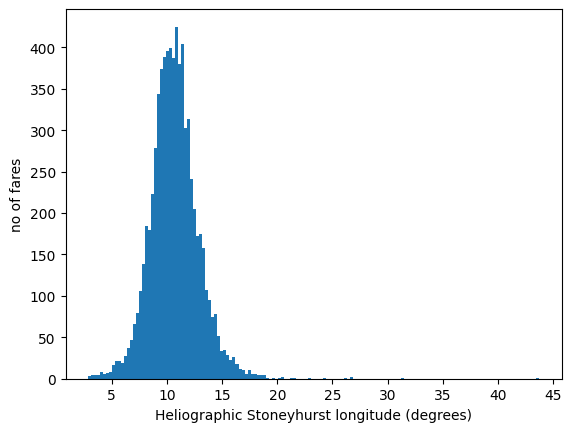

In [ ]:
plt.hist(full_data['Temp 1/4'], bins = 150)
plt.xlabel('Heliographic Stoneyhurst longitude (degrees)')
plt.ylabel('no of fares')
plt.show()

 - Lets take the two 'bands' at either side, and look more closely.
 - truncate from -90 to -85 and 85 to 90.

In [ ]:
limb_temps = full_data['Temp 1/4'][(full_data['hgs_x'] < -85) | (full_data['hgs_x'] > 85)][full_data['Temp 1/4'] < 8]

plt.hist(limb_temps, bins = 40)
plt.xlabel('Heliographic Stoneyhurst longitude (degrees)')
plt.ylabel('Onset Temperature')
plt.show()